## Setup, Loading Data and CDFs

In [1]:
DATA_NAME = 'full-scaleTesting-wavelet-mapping' # size-name-transform-channel

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
RERUN = True
CWD

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\results\\case-studies\\scaleTesting\\wavelet\\full\\mapping'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [4]:
num_samples = 10000
scale_values = [round_to_sigfigs(x) for x in np.arange(0.5, 10, 0.5)]
fake_data = { round_to_sigfigs(i) : np.sort(sample_prior(r = 1, eta =1, size = num_samples, scale = 1)) for i in scale_values}
fake_total_samples = { i : num_samples for i in scale_values}
fake_data

{0.5: array([-7.90945337, -7.66778712, -7.57906424, ...,  6.5907379 ,
         7.11872268, 10.10555949]),
 1.0: array([-8.10953026, -7.17196905, -6.93037221, ...,  6.57814466,
         7.04354086,  7.05903401]),
 1.5: array([-7.75675467, -7.20367241, -7.07695178, ...,  7.0253529 ,
         7.43933288,  8.03385876]),
 2.0: array([-8.04526575, -7.68506352, -7.21436442, ...,  7.13705987,
         7.53655706,  7.8229298 ]),
 2.5: array([-9.06708849, -7.22231454, -7.09160802, ...,  6.97671545,
         7.11512712,  8.32073183]),
 3.0: array([-8.88898187, -8.20109043, -7.46511461, ...,  8.46645787,
         8.956959  ,  9.51624068]),
 3.5: array([-9.33143634, -8.32271476, -7.39968665, ...,  6.76635178,
         7.12608074,  7.42216315]),
 4.0: array([-9.00550992, -7.89908663, -6.91354783, ...,  6.78429082,
         6.86299533,  8.72783195]),
 4.5: array([-7.81068984, -6.67305294, -6.65607884, ...,  6.70171717,
         6.89247409,  8.32925938]),
 5.0: array([-8.03533556, -7.57282222, -7.3360

In [5]:
group_data_map = fake_data
group_total_samples = fake_total_samples
if path_dict['transform'] == 'fourier':
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
else:
    GROUPS = scale_values

cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # For quick testing purposes
group_total_samples

{0.5: 10000,
 1.0: 10000,
 1.5: 10000,
 2.0: 10000,
 2.5: 10000,
 3.0: 10000,
 3.5: 10000,
 4.0: 10000,
 4.5: 10000,
 5.0: 10000,
 5.5: 10000,
 6.0: 10000,
 6.5: 10000,
 7.0: 10000,
 7.5: 10000,
 8.0: 10000,
 8.5: 10000,
 9.0: 10000,
 9.5: 10000}

In [6]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:824: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


(r,eta),cdf     r  eta  \
0  ((0.02, -1.4), <scipy.interpolate._fitpack2.In...  0.02 -1.4   
1  ((0.02, -1.3), <scipy.interpolate._fitpack2.In...  0.02 -1.3   
2  ((0.02, -1.2), <scipy.interpolate._fitpack2.In...  0.02 -1.2   
3  ((0.02, -1.1), <scipy.interpolate._fitpack2.In...  0.02 -1.1   
4  ((0.02, -1.0), <scipy.interpolate._fitpack2.In...  0.02 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  9.618487e+69   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.821735e+74   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.455488e+78   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.406735e+81   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  5.331443e+83   

       kurtosis  
0  1.391529e+25  
1  8.172634e+21  
2  4.131785e+19  
3  6.947275e+17  
4  2.562075e+16

## Bootstrapping the Variance and Kurtosis

In [7]:
n_bootstrap = int(1e3)
bootstrap_size = int(1e3)
ci = 0.99

In [8]:
bootstrap_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))
master_df_var_kurt_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not master_df_var_kurt_path.exists():
    for group in GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(master_df_var_kurt_path, index_col=GROUP)
var_kurt_df = pd.read_csv(bootstrap_path, index_col=GROUP)
master_df

Layer 0.5


100%|██████████| 1000/1000 [00:00<00:00, 1748.40it/s]


Layer 1.0


100%|██████████| 1000/1000 [00:00<00:00, 1692.35it/s]


Layer 1.5


100%|██████████| 1000/1000 [00:00<00:00, 1953.00it/s]


Layer 2.0


100%|██████████| 1000/1000 [00:00<00:00, 1222.12it/s]


Layer 2.5


100%|██████████| 1000/1000 [00:00<00:00, 1452.12it/s]


Layer 3.0


100%|██████████| 1000/1000 [00:00<00:00, 1181.23it/s]


Layer 3.5


100%|██████████| 1000/1000 [00:00<00:00, 1408.31it/s]


Layer 4.0


100%|██████████| 1000/1000 [00:00<00:00, 2911.46it/s]


Layer 4.5


100%|██████████| 1000/1000 [00:00<00:00, 2465.67it/s]


Layer 5.0


100%|██████████| 1000/1000 [00:00<00:00, 2256.37it/s]


Layer 5.5


100%|██████████| 1000/1000 [00:00<00:00, 2818.59it/s]


Layer 6.0


100%|██████████| 1000/1000 [00:00<00:00, 2421.82it/s]


Layer 6.5


100%|██████████| 1000/1000 [00:00<00:00, 2632.46it/s]


Layer 7.0


100%|██████████| 1000/1000 [00:00<00:00, 2126.18it/s]


Layer 7.5


100%|██████████| 1000/1000 [00:00<00:00, 1369.69it/s]


Layer 8.0


100%|██████████| 1000/1000 [00:00<00:00, 1203.68it/s]


Layer 8.5


100%|██████████| 1000/1000 [00:00<00:00, 1962.34it/s]


Layer 9.0


100%|██████████| 1000/1000 [00:00<00:00, 1467.29it/s]


Layer 9.5


100%|██████████| 1000/1000 [00:00<00:00, 1264.99it/s]


obs_var  var_lower  var_upper  obs_kurt  kurt_lower  kurt_upper  \
layer                                                                     
0.5    2.509465   2.164636   2.919925  1.269581    0.389254    3.209122   
1.0    2.503885   2.181268   2.858193  0.941049    0.272206    1.943380   
1.5    2.485618   2.190891   2.805048  1.124323    0.313008    2.095816   
2.0    2.489261   2.161048   2.872817  1.100883    0.317415    2.162095   
2.5    2.557698   2.212252   2.948829  1.232573    0.468037    2.646421   
3.0    2.503241   2.134142   2.906065  1.428454    0.281040    3.171830   
3.5    2.576197   2.168212   2.963658  1.288443    0.424441    2.594110   
4.0    2.498212   2.139287   2.869816  1.192245    0.246020    2.458366   
4.5    2.490417   2.159642   2.849280  1.015178    0.313818    2.113777   
5.0    2.448619   2.109041   2.812907  1.096387    0.308695    2.166305   
5.5    2.493580   2.151250   2.879953  1.095866    0.432241    1.943416   
6.0    2.543239   2.211811   2.962113  1.496473    0.446796    3.429836   
6.5    2.534604   2.186010   2.925306  1.125195    0.259654    2.420355   
7.0    2.570589   2.242152   2.943222  1.210663    0.369845    2.453118   
7.5    2.547876   2.218674   2.944834  1.280726    0.431298    2.705714   
8.0    2.527056   2.200404   2.941559  1.180929    0.423823    2.399797   
8.5    2.499162   2.159801   2.868180  0.988505    0.341329    2.144144   
9.0    2.482449   2.150246   2.871358  1.275047    0.367659    2.935418   
9.5    2.512150   2.183917   2.889866  1.075017    0.360559    2.129241   

       total_samples  
layer                 
0.5          10000.0  
1.0          10000.0  
1.5          10000.0  
2.0          10000.0  
2.5          10000.0  
3.0          10000.0  
3.5          10000.0  
4.0          10000.0  
4.5          10000.0  
5.0          10000.0  
5.5          10000.0  
6.0          10000.0  
6.5          10000.0  
7.0          10000.0  
7.5          10000.0  
8.0          10000.0  
8.5          10000.0  
9.0          10000.0  
9.5          10000.0

## Initial Grid Search and Hypothesis Test Plots

####
Layer  0.5


100%|██████████| 55966/55966 [01:31<00:00, 611.32it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


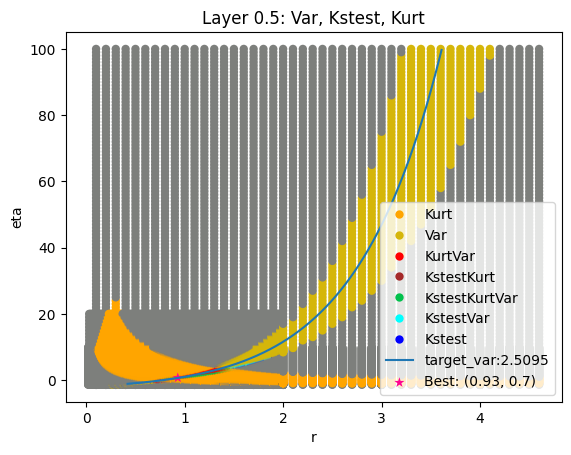

####
Layer  1.0


100%|██████████| 55966/55966 [01:24<00:00, 664.51it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


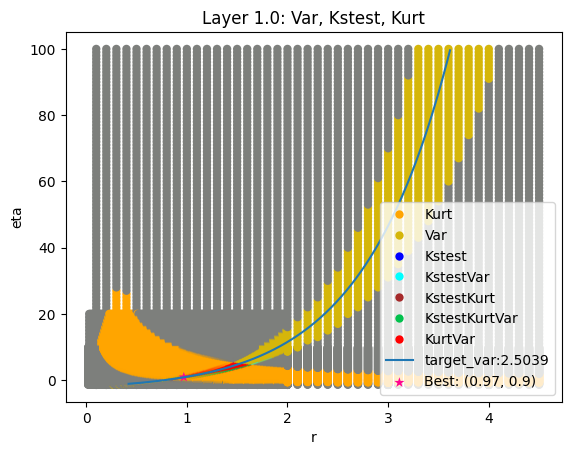

####
Layer  1.5


100%|██████████| 55966/55966 [01:21<00:00, 686.84it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


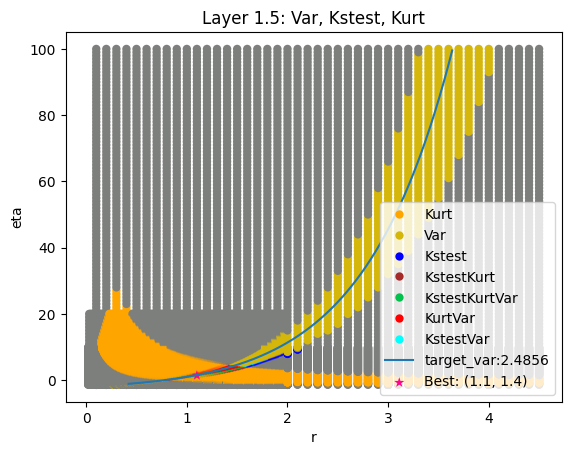

####
Layer  2.0


100%|██████████| 55966/55966 [01:18<00:00, 713.01it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


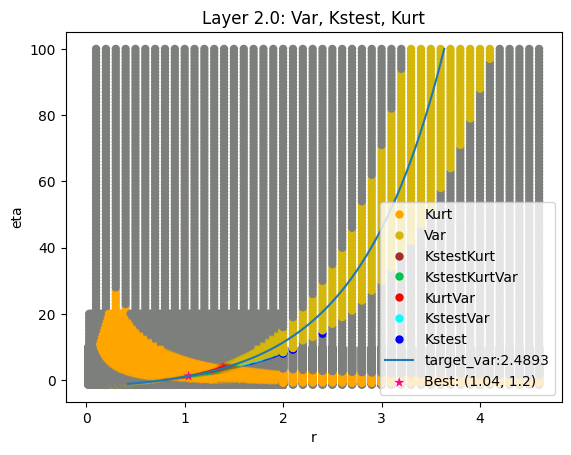

####
Layer  2.5


100%|██████████| 55966/55966 [01:21<00:00, 685.48it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


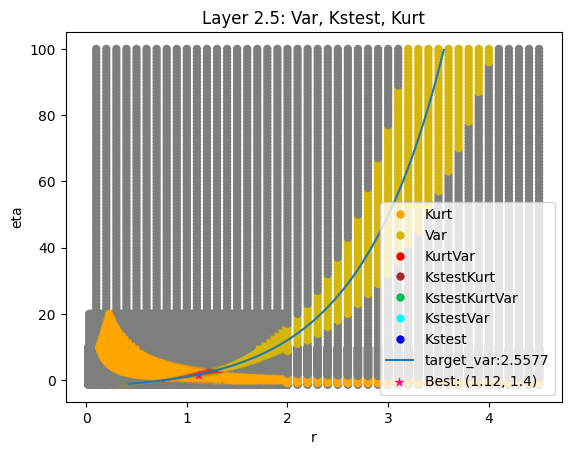

####
Layer  3.0


100%|██████████| 55966/55966 [01:26<00:00, 643.68it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


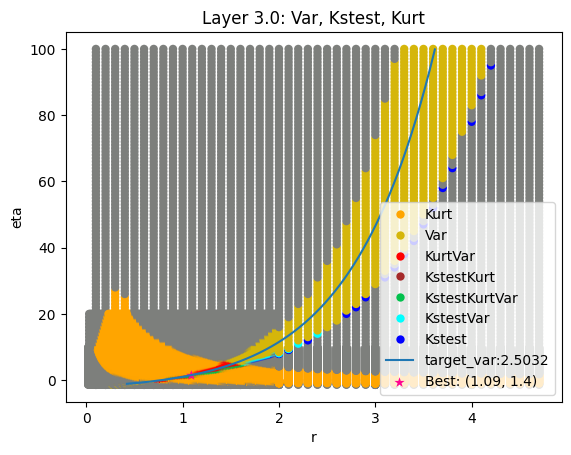

####
Layer  3.5


100%|██████████| 55966/55966 [01:24<00:00, 662.85it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


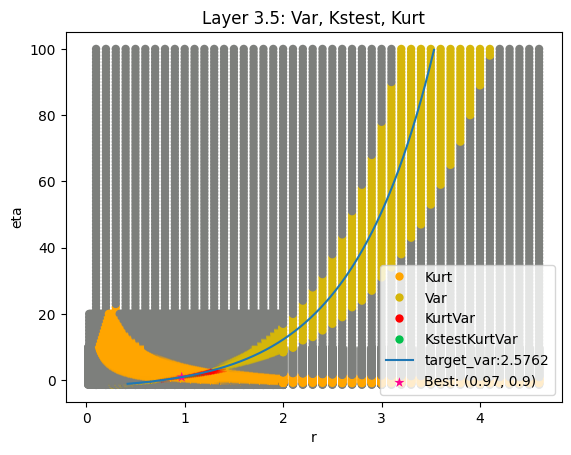

####
Layer  4.0


100%|██████████| 55966/55966 [01:17<00:00, 717.99it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


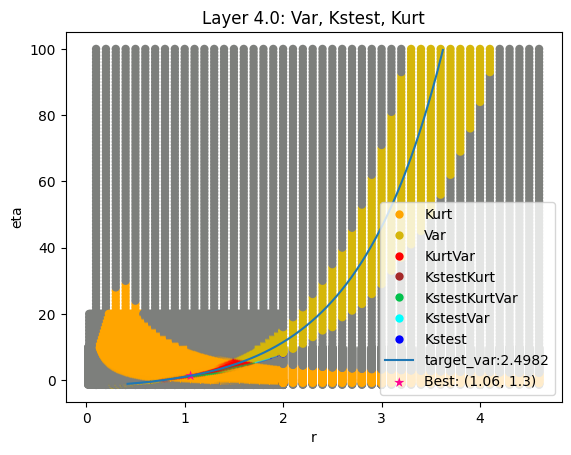

####
Layer  4.5


100%|██████████| 55966/55966 [01:20<00:00, 698.97it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


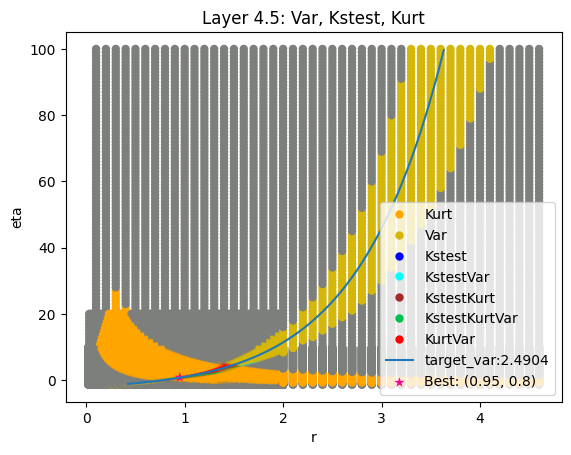

####
Layer  5.0


100%|██████████| 55966/55966 [01:18<00:00, 713.87it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


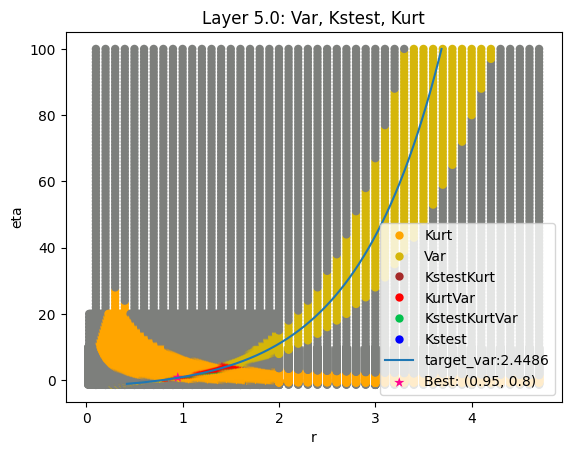

####
Layer  5.5


100%|██████████| 55966/55966 [01:17<00:00, 718.45it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


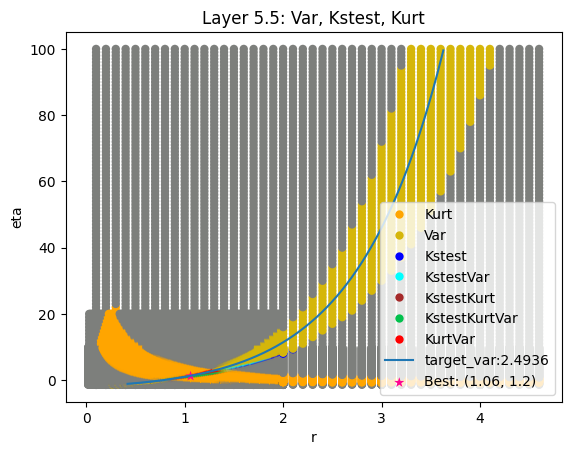

####
Layer  6.0


100%|██████████| 55966/55966 [01:21<00:00, 688.08it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


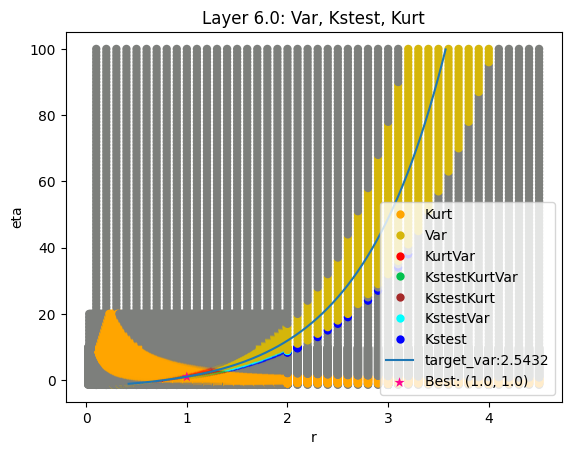

####
Layer  6.5


100%|██████████| 55966/55966 [01:19<00:00, 701.09it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


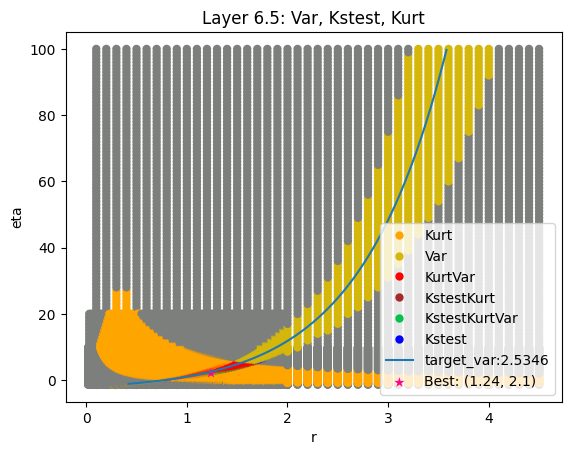

####
Layer  7.0


100%|██████████| 55966/55966 [01:16<00:00, 734.61it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


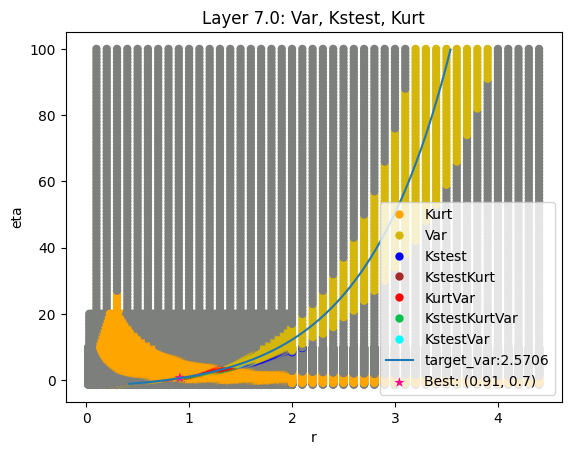

####
Layer  7.5


100%|██████████| 55966/55966 [01:19<00:00, 706.48it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


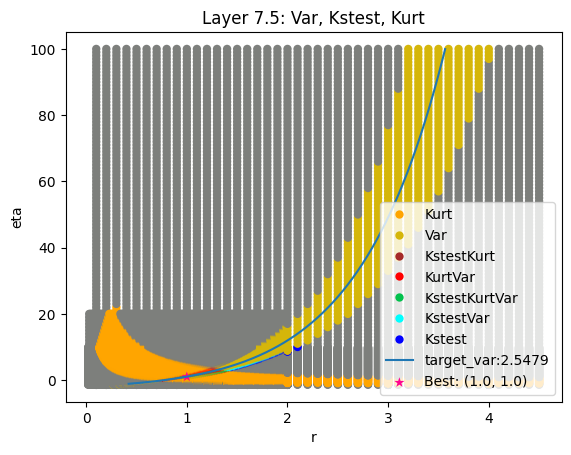

####
Layer  8.0


100%|██████████| 55966/55966 [01:20<00:00, 693.57it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


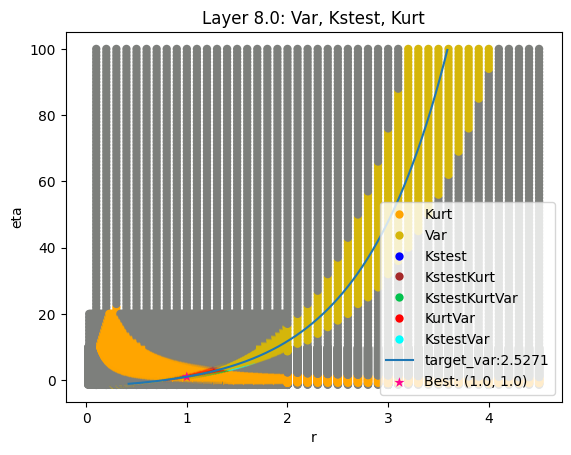

####
Layer  8.5


100%|██████████| 55966/55966 [01:20<00:00, 699.12it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


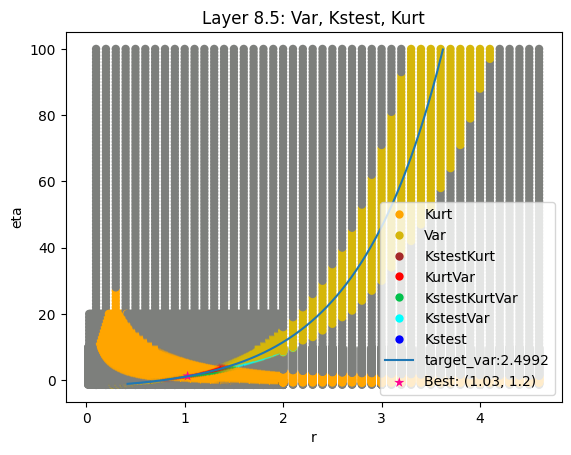

####
Layer  9.0


100%|██████████| 55966/55966 [01:20<00:00, 692.11it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


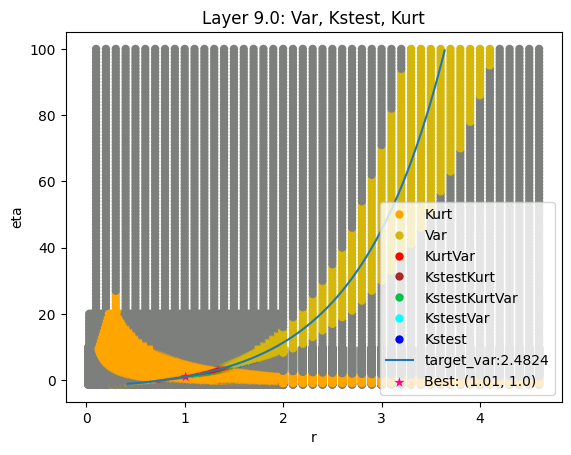

####
Layer  9.5


100%|██████████| 55966/55966 [01:21<00:00, 686.87it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 10000, Without approximation : 10000.0


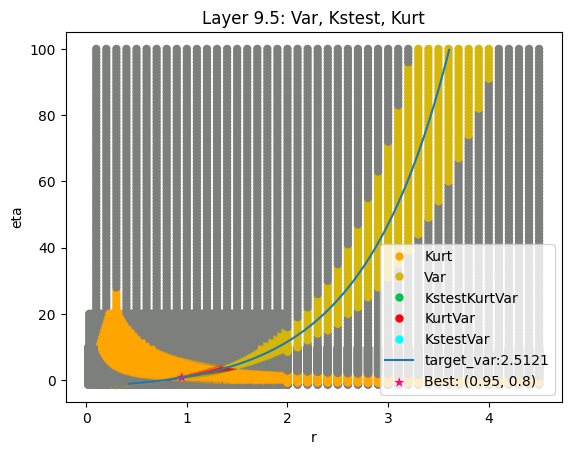

obs_var  var_lower  var_upper  obs_kurt  kurt_lower  kurt_upper  \
layer                                                                     
0.5    2.509465   2.164636   2.919925  1.269581    0.389254    3.209122   
1.0    2.503885   2.181268   2.858193  0.941049    0.272206    1.943380   
1.5    2.485618   2.190891   2.805048  1.124323    0.313008    2.095816   
2.0    2.489261   2.161048   2.872817  1.100883    0.317415    2.162095   
2.5    2.557698   2.212252   2.948829  1.232573    0.468037    2.646421   
3.0    2.503241   2.134142   2.906065  1.428454    0.281040    3.171830   
3.5    2.576197   2.168212   2.963658  1.288443    0.424441    2.594110   
4.0    2.498212   2.139287   2.869816  1.192245    0.246020    2.458366   
4.5    2.490417   2.159642   2.849280  1.015178    0.313818    2.113777   
5.0    2.448619   2.109041   2.812907  1.096387    0.308695    2.166305   
5.5    2.493580   2.151250   2.879953  1.095866    0.432241    1.943416   
6.0    2.543239   2.211811   2.962113  1.496473    0.446796    3.429836   
6.5    2.534604   2.186010   2.925306  1.125195    0.259654    2.420355   
7.0    2.570589   2.242152   2.943222  1.210663    0.369845    2.453118   
7.5    2.547876   2.218674   2.944834  1.280726    0.431298    2.705714   
8.0    2.527056   2.200404   2.941559  1.180929    0.423823    2.399797   
8.5    2.499162   2.159801   2.868180  0.988505    0.341329    2.144144   
9.0    2.482449   2.150246   2.871358  1.275047    0.367659    2.935418   
9.5    2.512150   2.183917   2.889866  1.075017    0.360559    2.129241   

       total_samples  initial_r  initial_eta  kstest_stat_initial  \
layer                                                               
0.5          10000.0       0.93          0.7             0.003729   
1.0          10000.0       0.97          0.9             0.004545   
1.5          10000.0       1.10          1.4             0.005661   
2.0          10000.0       1.04          1.2             0.005442   
2.5          10000.0       1.12          1.4             0.010948   
3.0          10000.0       1.09          1.4             0.005578   
3.5          10000.0       0.97          0.9             0.007496   
4.0          10000.0       1.06          1.3             0.008108   
4.5          10000.0       0.95          0.8             0.004450   
5.0          10000.0       0.95          0.8             0.010952   
5.5          10000.0       1.06          1.2             0.006411   
6.0          10000.0       1.00          1.0             0.005539   
6.5          10000.0       1.24          2.1             0.009348   
7.0          10000.0       0.91          0.7             0.005748   
7.5          10000.0       1.00          1.0             0.005823   
8.0          10000.0       1.00          1.0             0.004865   
8.5          10000.0       1.03          1.2             0.006337   
9.0          10000.0       1.01          1.0             0.005631   
9.5          10000.0       0.95          0.8             0.006691   

       kstest_stat_cutoff_0.05  
layer                           
0.5                   0.013564  
1.0                   0.013564  
1.5                   0.013564  
2.0                   0.013564  
2.5                   0.013564  
3.0                   0.013564  
3.5                   0.013564  
4.0                   0.013564  
4.5                   0.013564  
5.0                   0.013564  
5.5                   0.013564  
6.0                   0.013564  
6.5                   0.013564  
7.0                   0.013564  
7.5                   0.013564  
8.0                   0.013564  
8.5                   0.013564  
9.0                   0.013564  
9.5                   0.013564

In [9]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

if RERUN or not master_df_combo_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()
    ksstats_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = initial_param)
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

        # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

<Axes: xlabel='initial_r', ylabel='initial_eta'>

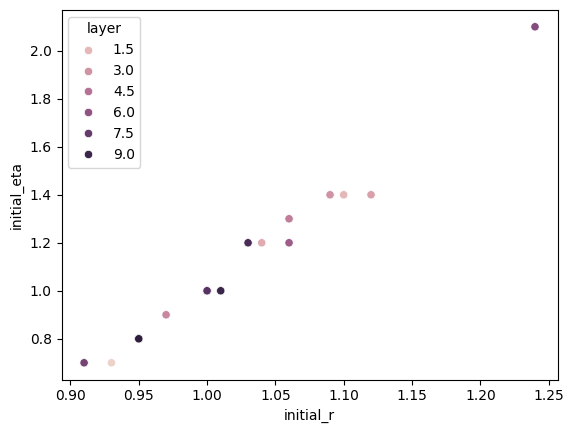

In [10]:
sns.scatterplot(data = master_df, x = 'initial_r', y = 'initial_eta', hue='layer')

### Search over $\eta=0$

In [11]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

if RERUN or not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
            master_df.loc[group, 'best_r_eta0'] = best_param_eta0[0]
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            master_df.loc[group, 'best_r_eta0'] = master_df.loc[group, 'initial_r']
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

100%|██████████| 369/369 [00:00<00:00, 820.07it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 813.81it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 828.77it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 770.94it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 807.84it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 428.03it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 435.07it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 453.54it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 487.81it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 845.91it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 855.99it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 855.65it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 854.69it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 856.72it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 851.69it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 853.09it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 785.90it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 655.51it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 459.38it/s]

Finding Minimum after computing 369 CDFs


obs_var  var_lower  var_upper  obs_kurt  kurt_lower  kurt_upper  \
layer                                                                     
0.5    2.509465   2.164636   2.919925  1.269581    0.389254    3.209122   
1.0    2.503885   2.181268   2.858193  0.941049    0.272206    1.943380   
1.5    2.485618   2.190891   2.805048  1.124323    0.313008    2.095816   
2.0    2.489261   2.161048   2.872817  1.100883    0.317415    2.162095   
2.5    2.557698   2.212252   2.948829  1.232573    0.468037    2.646421   
3.0    2.503241   2.134142   2.906065  1.428454    0.281040    3.171830   
3.5    2.576197   2.168212   2.963658  1.288443    0.424441    2.594110   
4.0    2.498212   2.139287   2.869816  1.192245    0.246020    2.458366   
4.5    2.490417   2.159642   2.849280  1.015178    0.313818    2.113777   
5.0    2.448619   2.109041   2.812907  1.096387    0.308695    2.166305   
5.5    2.493580   2.151250   2.879953  1.095866    0.432241    1.943416   
6.0    2.543239   2.211811   2.962113  1.496473    0.446796    3.429836   
6.5    2.534604   2.186010   2.925306  1.125195    0.259654    2.420355   
7.0    2.570589   2.242152   2.943222  1.210663    0.369845    2.453118   
7.5    2.547876   2.218674   2.944834  1.280726    0.431298    2.705714   
8.0    2.527056   2.200404   2.941559  1.180929    0.423823    2.399797   
8.5    2.499162   2.159801   2.868180  0.988505    0.341329    2.144144   
9.0    2.482449   2.150246   2.871358  1.275047    0.367659    2.935418   
9.5    2.512150   2.183917   2.889866  1.075017    0.360559    2.129241   

       total_samples  initial_r  initial_eta  kstest_stat_initial  \
layer                                                               
0.5          10000.0       0.93          0.7             0.003729   
1.0          10000.0       0.97          0.9             0.004545   
1.5          10000.0       1.10          1.4             0.005661   
2.0          10000.0       1.04          1.2             0.005442   
2.5          10000.0       1.12          1.4             0.010948   
3.0          10000.0       1.09          1.4             0.005578   
3.5          10000.0       0.97          0.9             0.007496   
4.0          10000.0       1.06          1.3             0.008108   
4.5          10000.0       0.95          0.8             0.004450   
5.0          10000.0       0.95          0.8             0.010952   
5.5          10000.0       1.06          1.2             0.006411   
6.0          10000.0       1.00          1.0             0.005539   
6.5          10000.0       1.24          2.1             0.009348   
7.0          10000.0       0.91          0.7             0.005748   
7.5          10000.0       1.00          1.0             0.005823   
8.0          10000.0       1.00          1.0             0.004865   
8.5          10000.0       1.03          1.2             0.006337   
9.0          10000.0       1.01          1.0             0.005631   
9.5          10000.0       0.95          0.8             0.006691   

       kstest_stat_cutoff_0.05  best_r_eta0  kstest_stat_eta0  
layer                                                          
0.5                   0.013564         0.73          0.012462  
1.0                   0.013564         0.72          0.013676  
1.5                   0.013564         0.72          0.015412  
2.0                   0.013564         0.72          0.017508  
2.5                   0.013564         0.71          0.015344  
3.0                   0.013564         0.72          0.016517  
3.5                   0.013564         0.72          0.016742  
4.0                   0.013564         0.71          0.019338  
4.5                   0.013564         0.73          0.014110  
5.0                   0.013564         0.71          0.018238  
5.5                   0.013564         0.72          0.016704  
6.0                   0.013564         0.73          0.015696  
6.5                   0.013564         0.70          0.018289  
7.0                   

## Optimization

In [12]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

In [14]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
rEtaKsstats_dict_path = Path(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))


SKIP_OPTIMIZE_STEP = True
NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    rEtaKsstats_dict = dict()

    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(0, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i, 8), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i, 8)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group].sort_values(['r', 'eta'])
            rEtaKsstats_dict[group] = [temp_df['r'], temp_df['eta'], temp_df['ksstat']]

            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', 'best_r', 'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
    pd.to_pickle(rEtaKsstats_dict, os.path.join(CWD, "cache", 'rEtaKsstats_dict.pickle'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

obs_var  var_lower  var_upper  obs_kurt  kurt_lower  kurt_upper  \
layer                                                                     
0.5    2.509465   2.164636   2.919925  1.269581    0.389254    3.209122   
1.0    2.503885   2.181268   2.858193  0.941049    0.272206    1.943380   
1.5    2.485618   2.190891   2.805048  1.124323    0.313008    2.095816   
2.0    2.489261   2.161048   2.872817  1.100883    0.317415    2.162095   
2.5    2.557698   2.212252   2.948829  1.232573    0.468037    2.646421   
3.0    2.503241   2.134142   2.906065  1.428454    0.281040    3.171830   
3.5    2.576197   2.168212   2.963658  1.288443    0.424441    2.594110   
4.0    2.498212   2.139287   2.869816  1.192245    0.246020    2.458366   
4.5    2.490417   2.159642   2.849280  1.015178    0.313818    2.113777   
5.0    2.448619   2.109041   2.812907  1.096387    0.308695    2.166305   
5.5    2.493580   2.151250   2.879953  1.095866    0.432241    1.943416   
6.0    2.543239   2.211811   2.962113  1.496473    0.446796    3.429836   
6.5    2.534604   2.186010   2.925306  1.125195    0.259654    2.420355   
7.0    2.570589   2.242152   2.943222  1.210663    0.369845    2.453118   
7.5    2.547876   2.218674   2.944834  1.280726    0.431298    2.705714   
8.0    2.527056   2.200404   2.941559  1.180929    0.423823    2.399797   
8.5    2.499162   2.159801   2.868180  0.988505    0.341329    2.144144   
9.0    2.482449   2.150246   2.871358  1.275047    0.367659    2.935418   
9.5    2.512150   2.183917   2.889866  1.075017    0.360559    2.129241   

       total_samples  initial_r  initial_eta  kstest_stat_initial  \
layer                                                               
0.5          10000.0       0.93          0.7             0.003729   
1.0          10000.0       0.97          0.9             0.004545   
1.5          10000.0       1.10          1.4             0.005661   
2.0          10000.0       1.04          1.2             0.005442   
2.5          10000.0       1.12          1.4             0.010948   
3.0          10000.0       1.09          1.4             0.005578   
3.5          10000.0       0.97          0.9             0.007496   
4.0          10000.0       1.06          1.3             0.008108   
4.5          10000.0       0.95          0.8             0.004450   
5.0          10000.0       0.95          0.8             0.010952   
5.5          10000.0       1.06          1.2             0.006411   
6.0          10000.0       1.00          1.0             0.005539   
6.5          10000.0       1.24          2.1             0.009348   
7.0          10000.0       0.91          0.7             0.005748   
7.5          10000.0       1.00          1.0             0.005823   
8.0          10000.0       1.00          1.0             0.004865   
8.5          10000.0       1.03          1.2             0.006337   
9.0          10000.0       1.01          1.0             0.005631   
9.5          10000.0       0.95          0.8             0.006691   

       kstest_stat_cutoff_0.05  best_r_eta0  kstest_stat_eta0  best_r  \
layer                                                                   
0.5                   0.013564         0.73          0.012462    0.93   
1.0                   0.013564         0.72          0.013676    0.97   
1.5                   0.013564         0.72          0.015412    1.10   
2.0                   0.013564         0.72          0.017508    1.04   
2.5                   0.013564         0.71          0.015344    1.12   
3.0                   0.013564         0.72          0.016517    1.09   
3.5                   0.013564         0.72          0.016742    0.97   
4.0                   0.013564         0.71          0.019338    1.06   
4.5                   0.013564         0.73          0.014110    0.95   
5.0                   0.013564         0.71          0.018238    0.95   
5.5                   0.013564         0.72          0.016704    1.06   
6.0                   0.013564   

## Comparing Empirical and Computed CDF/PDF

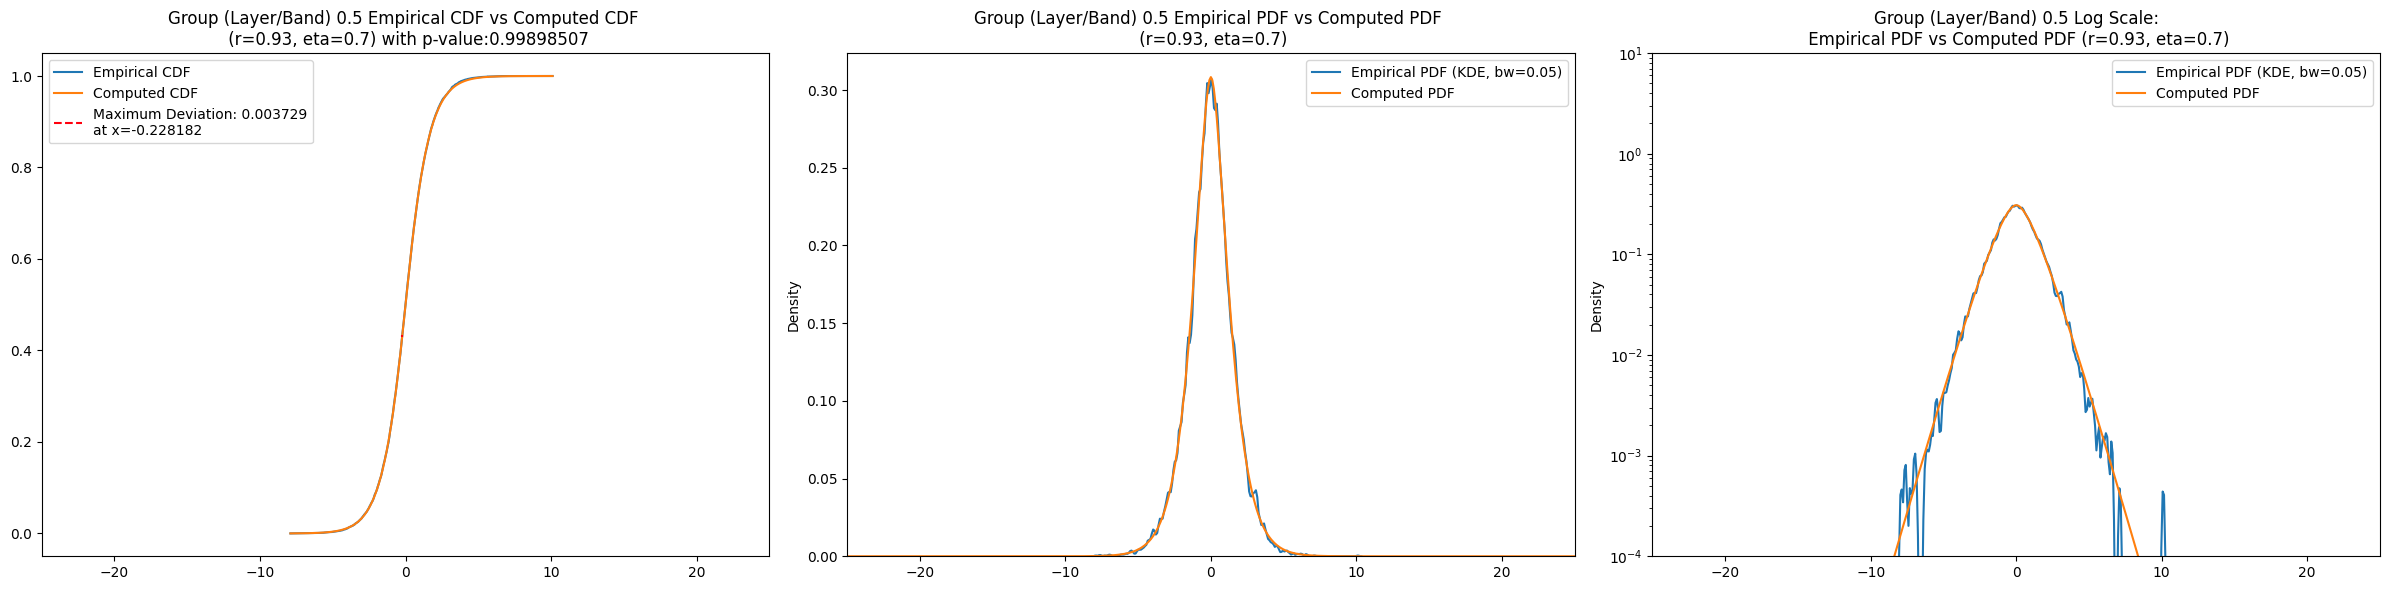

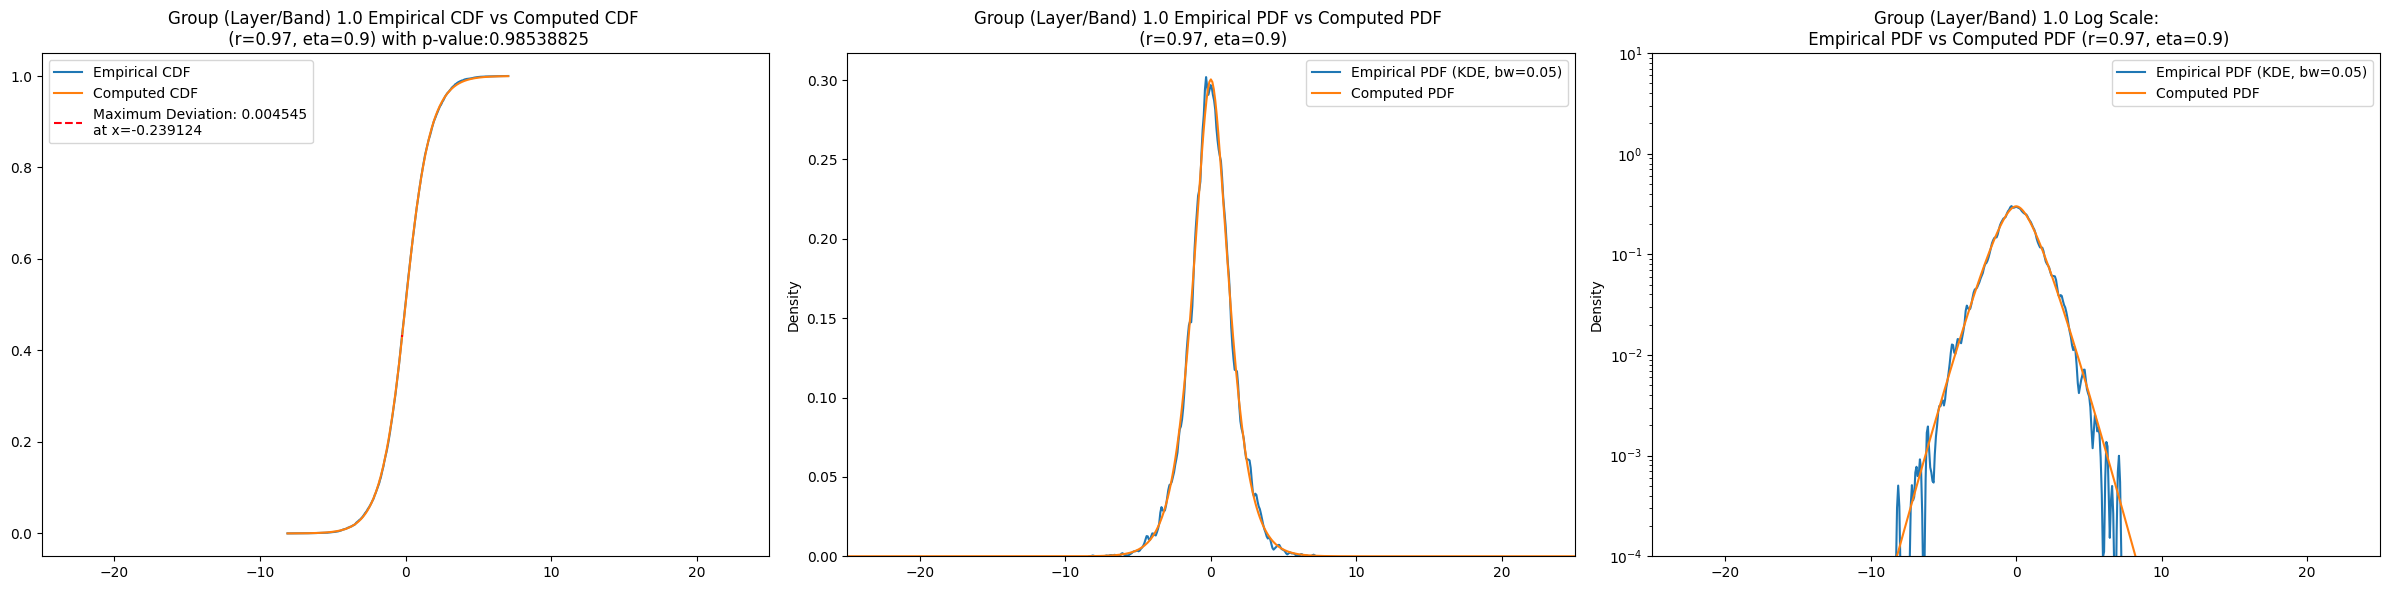

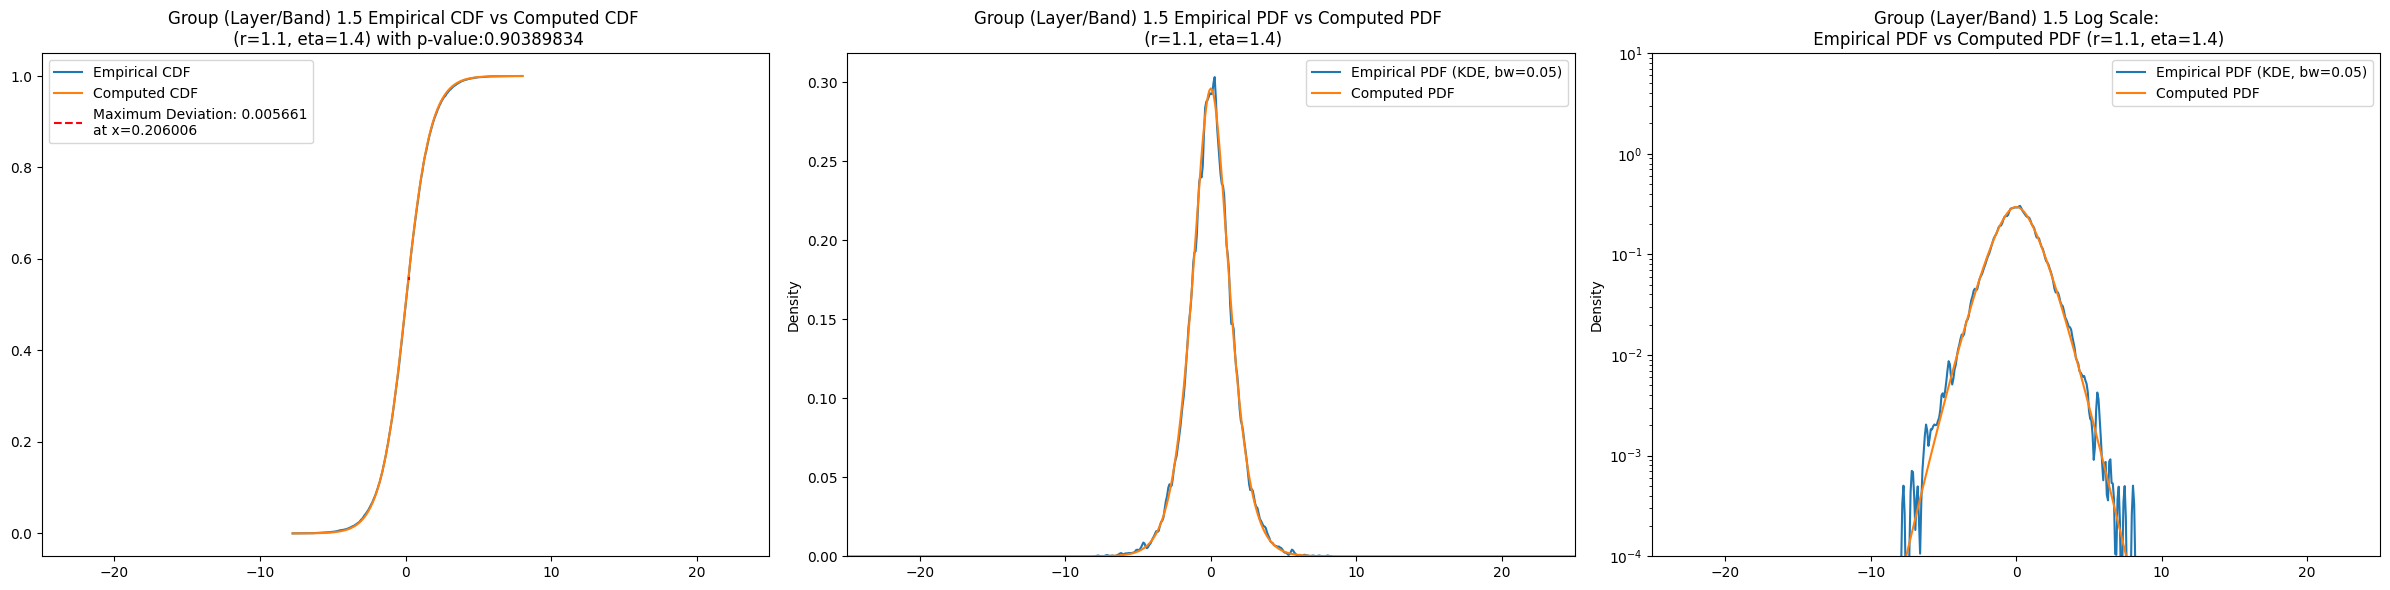

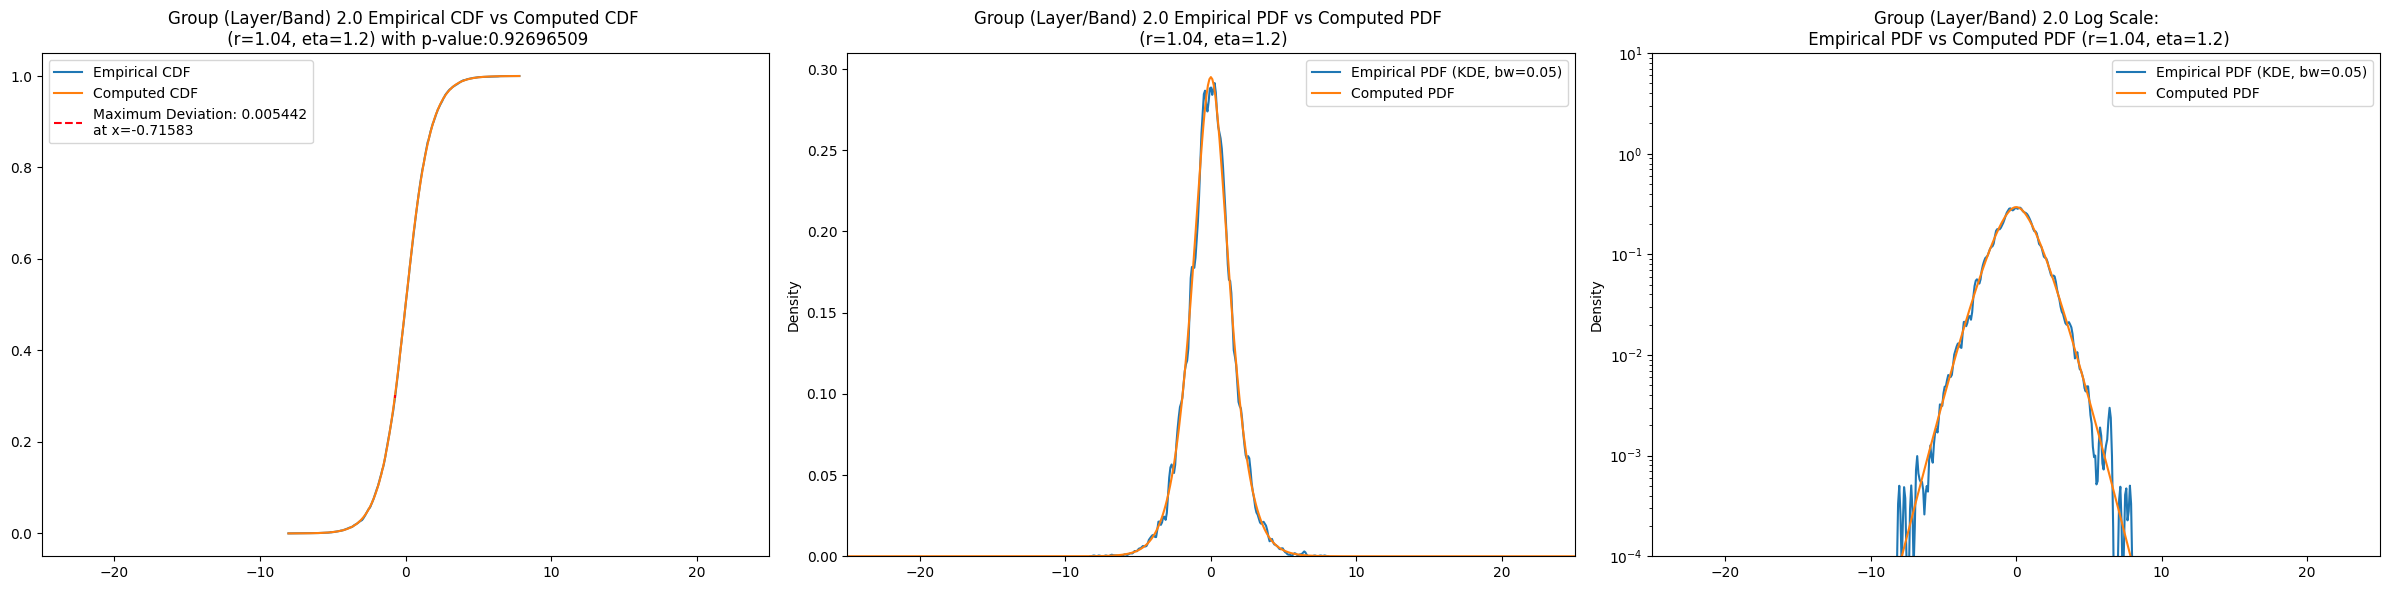

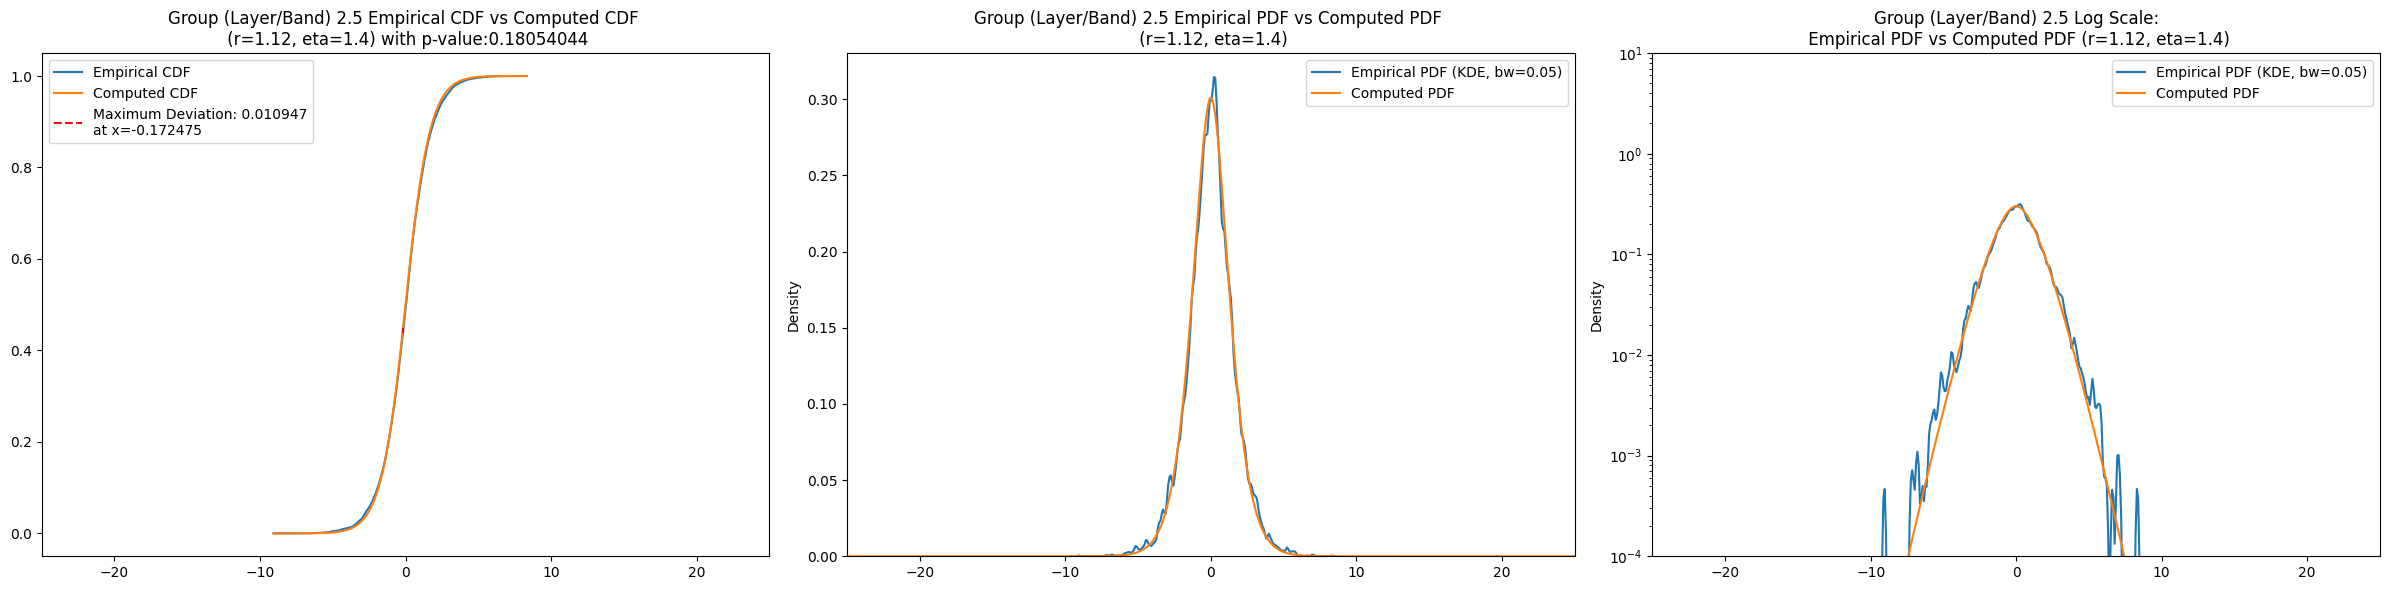

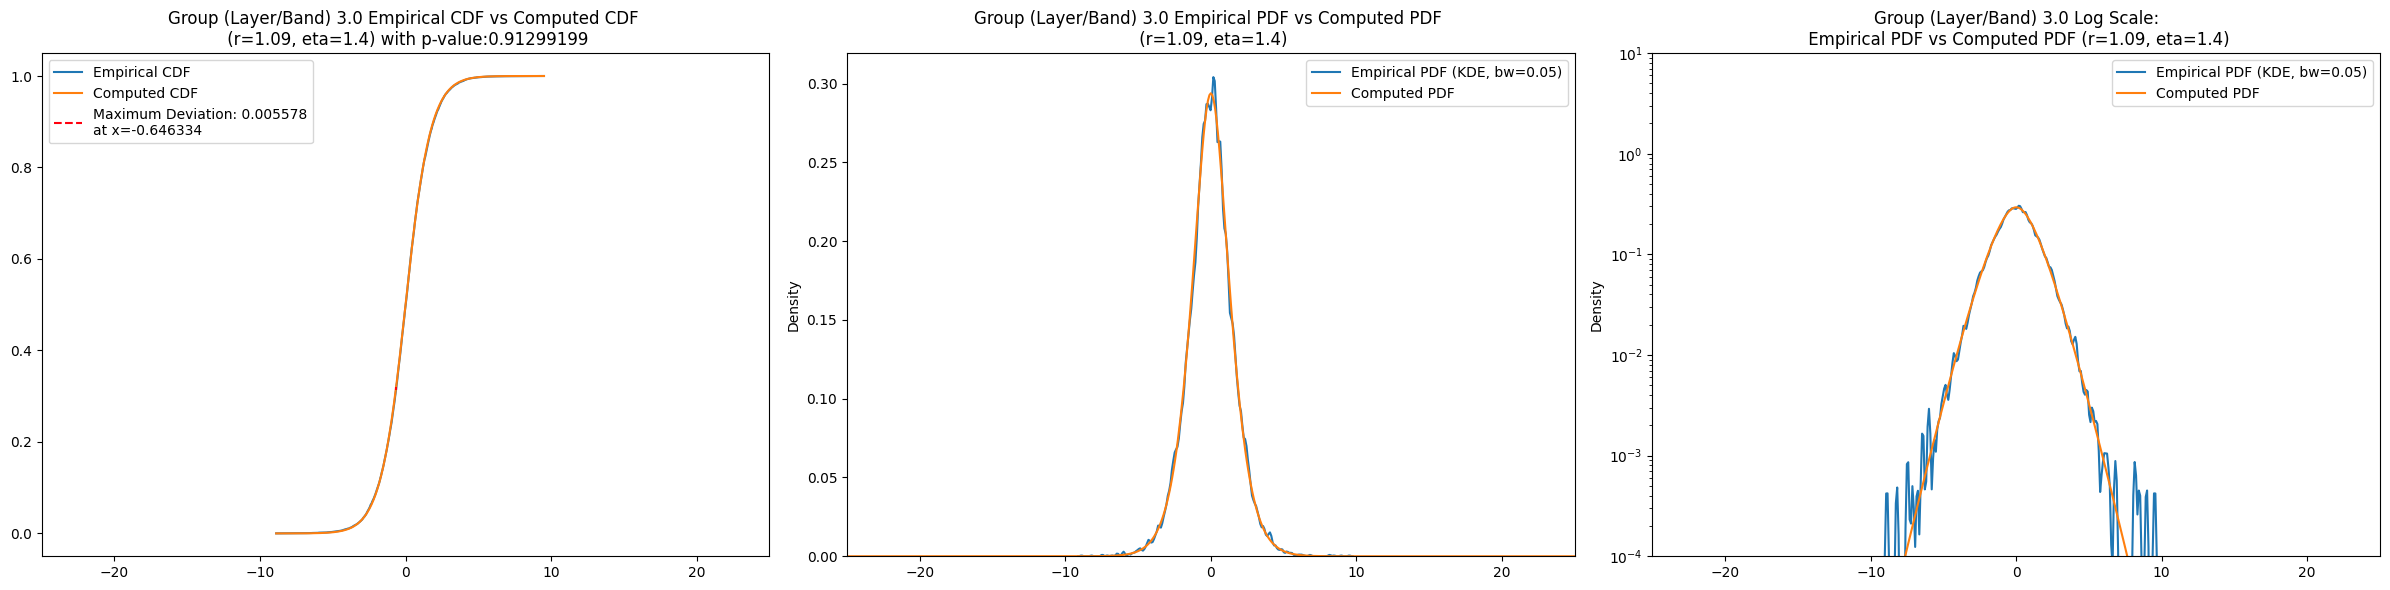

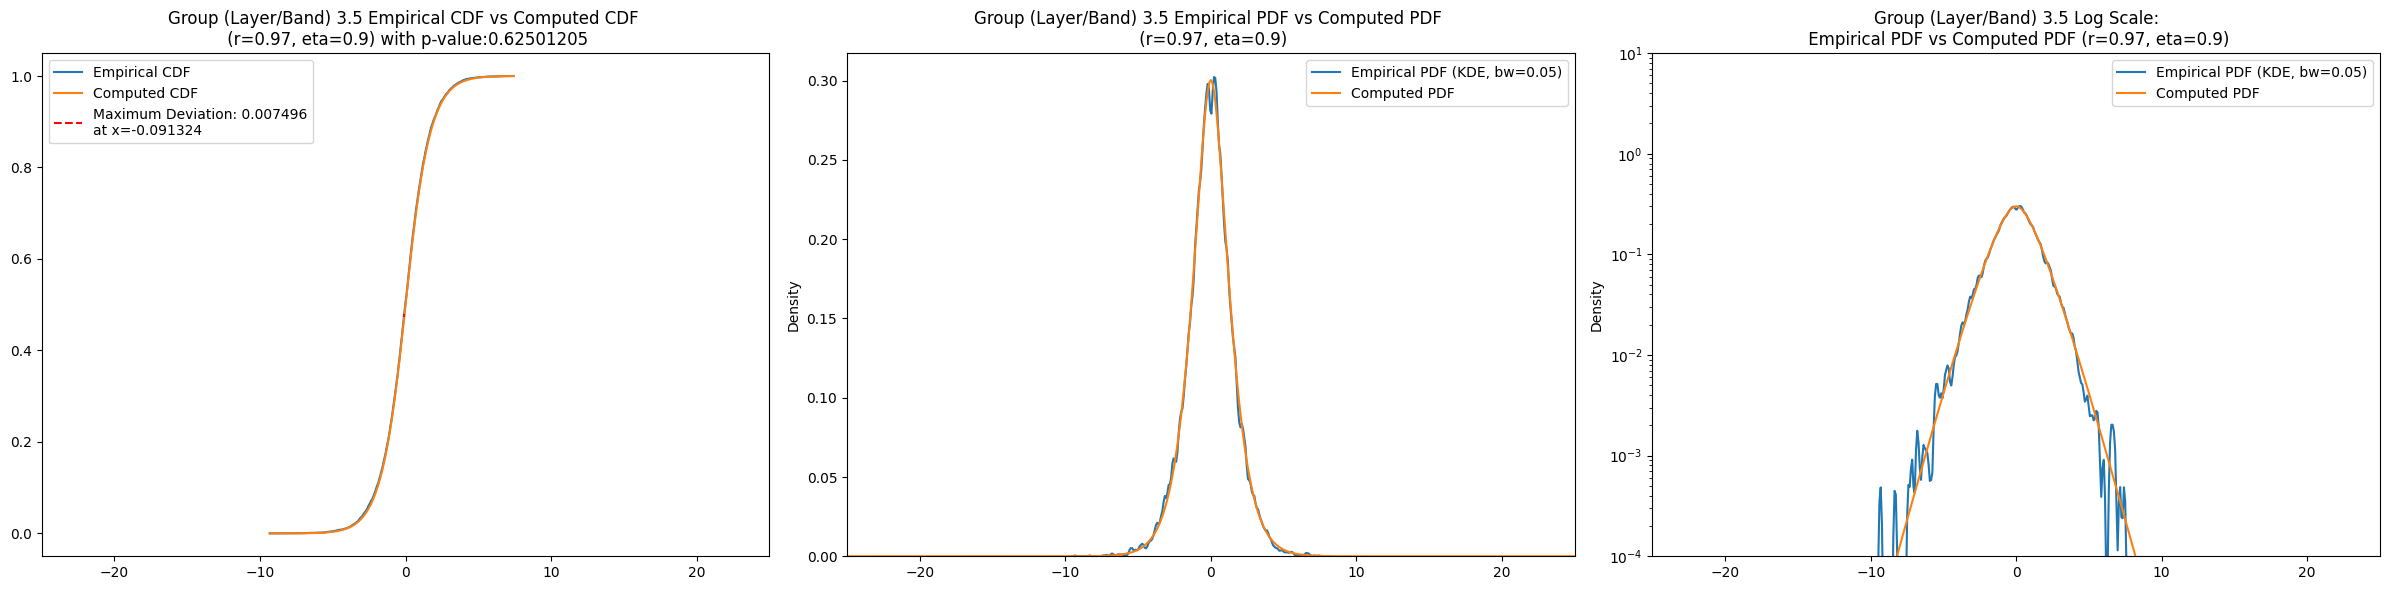

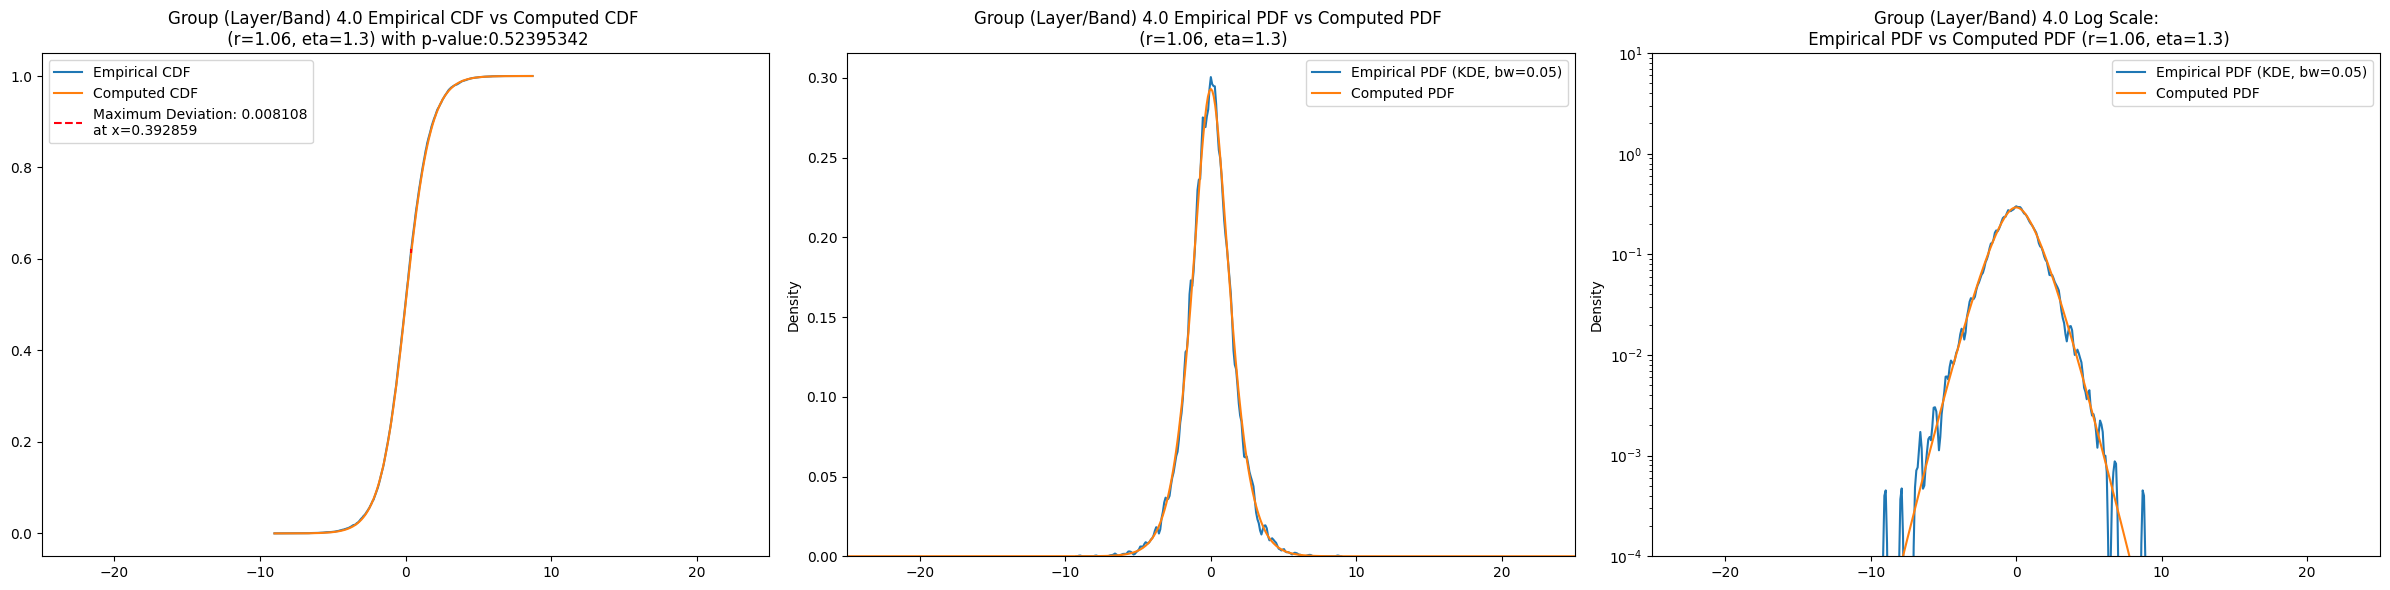

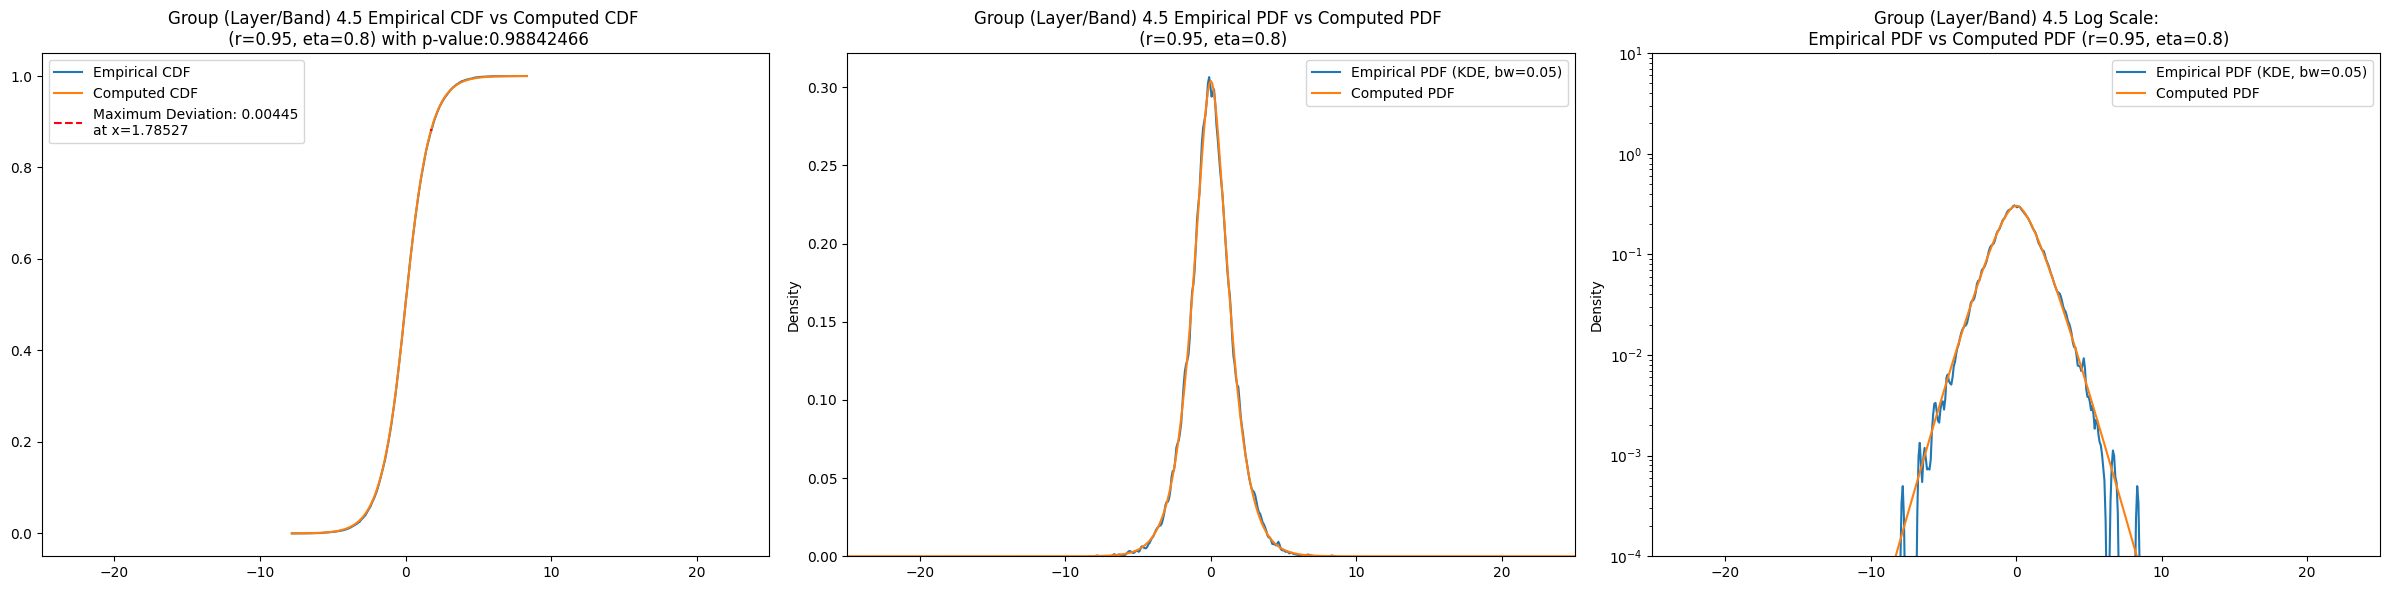

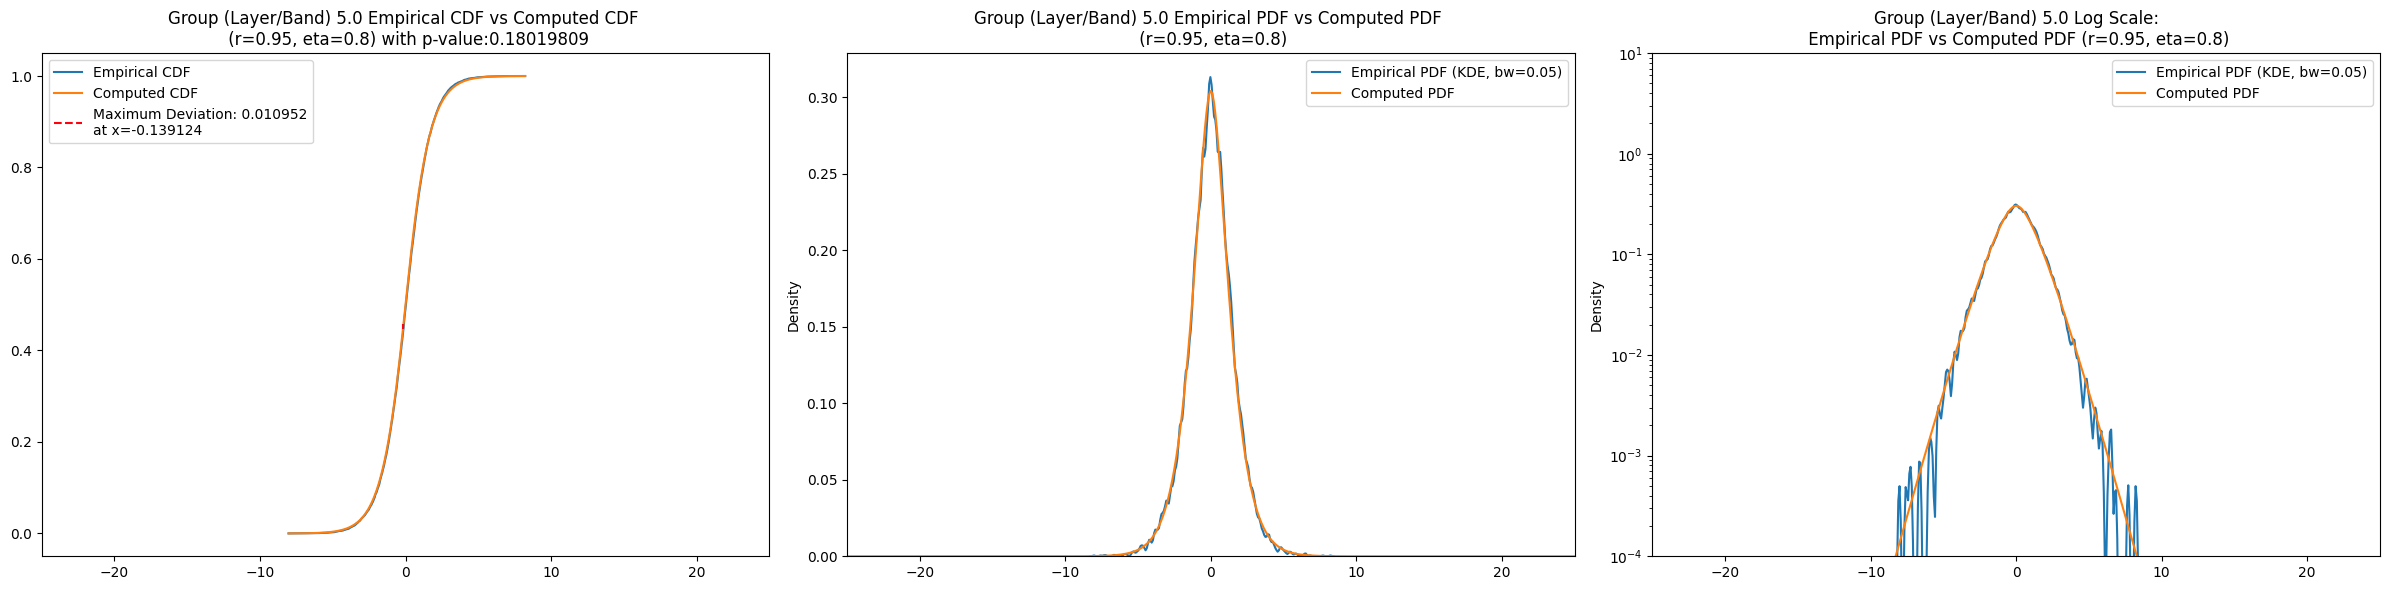

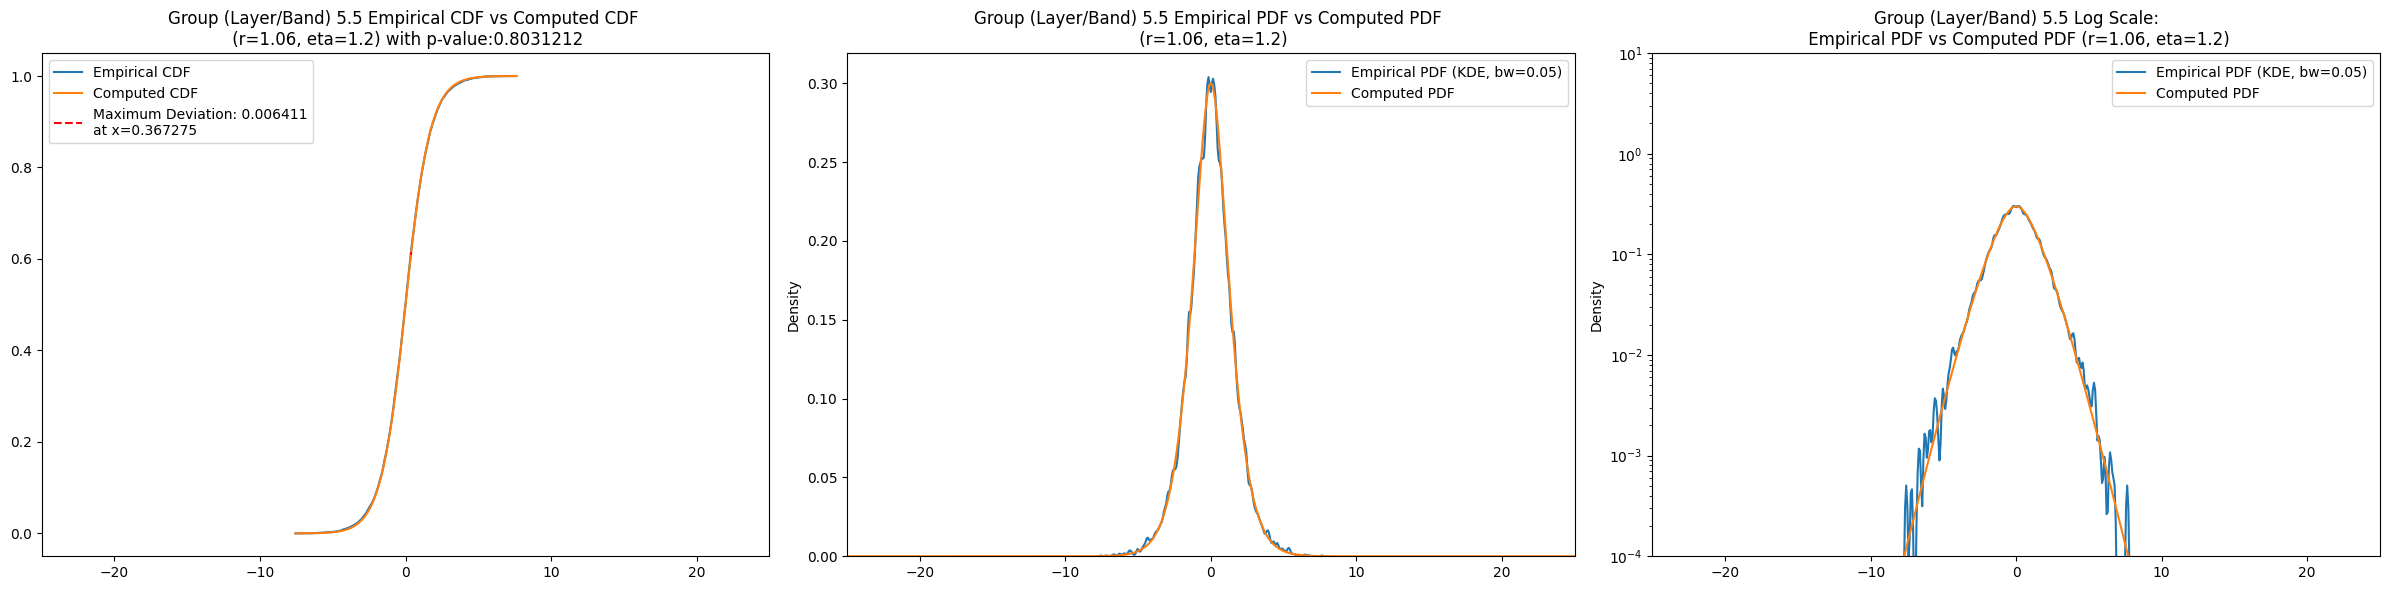

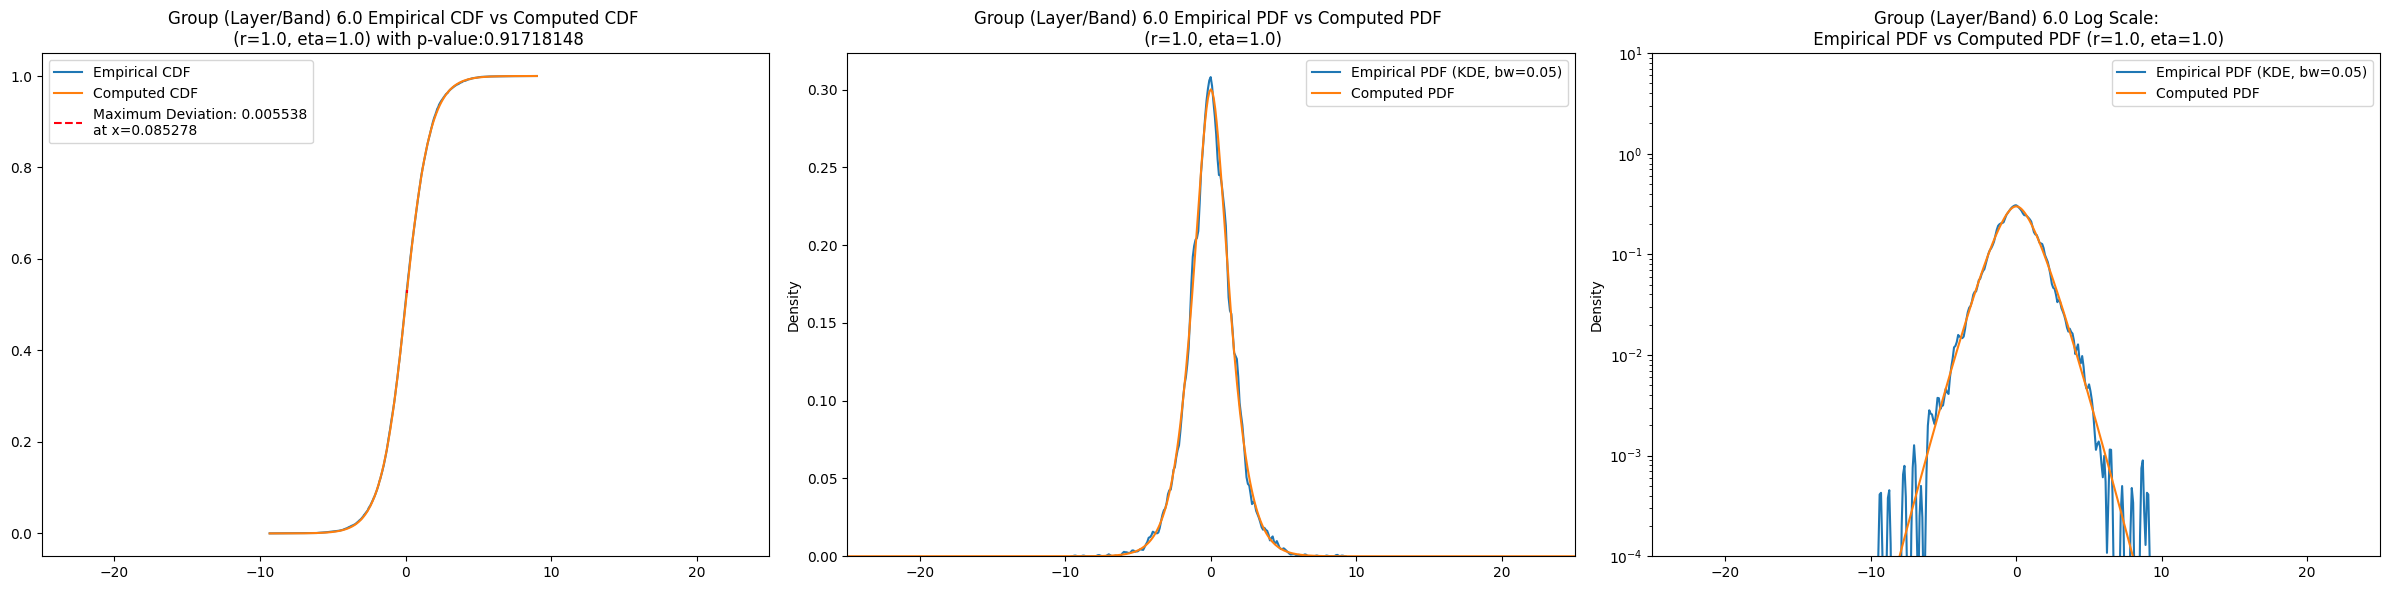

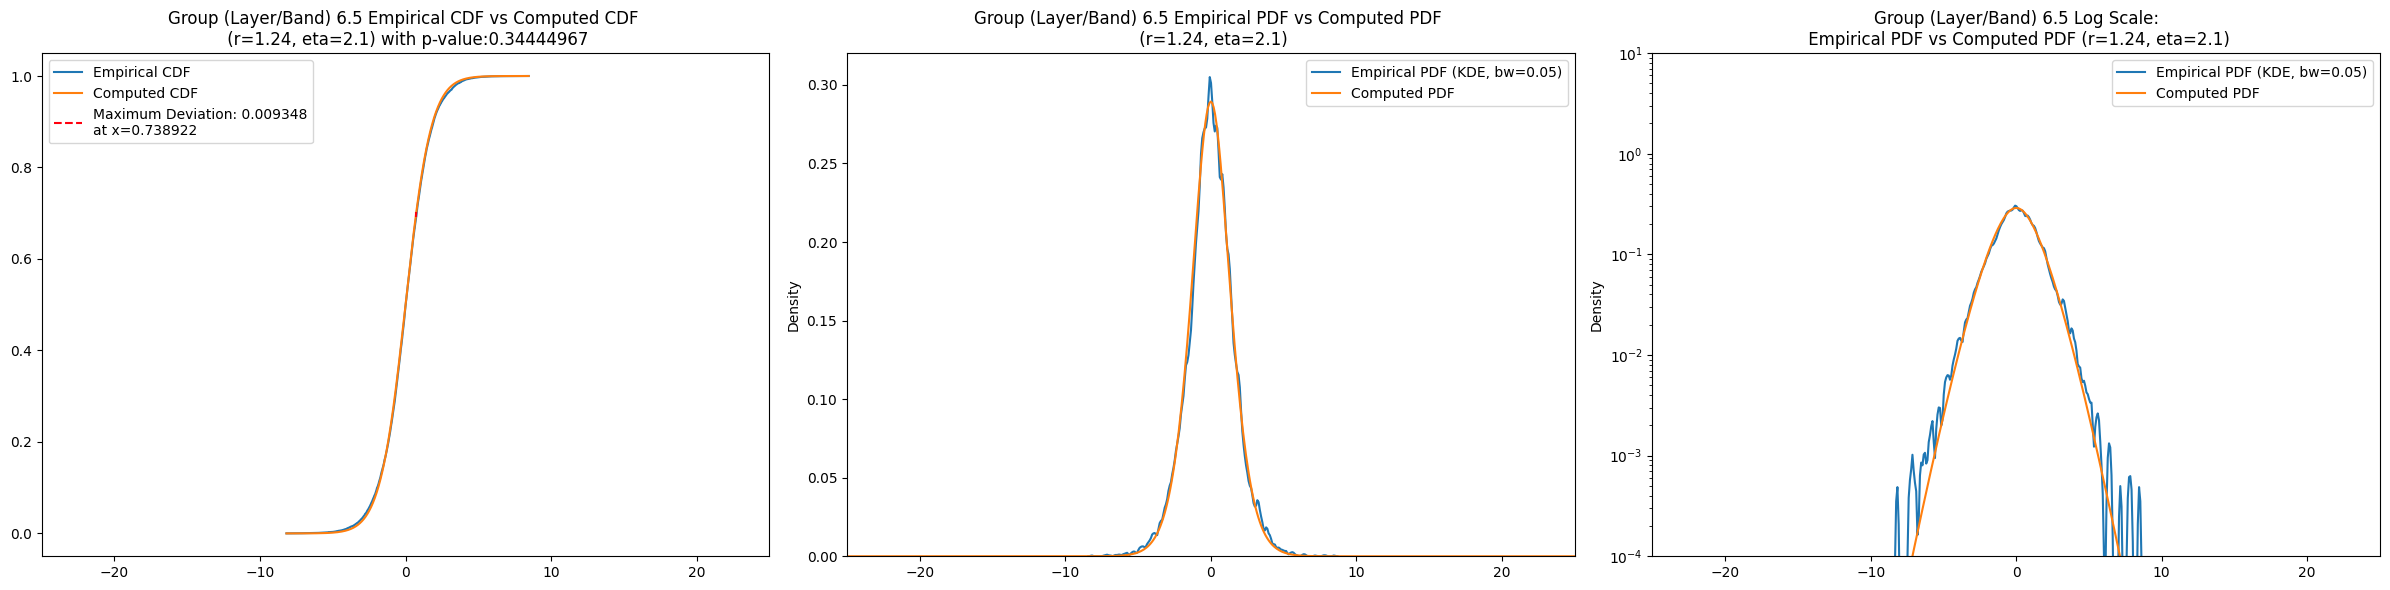

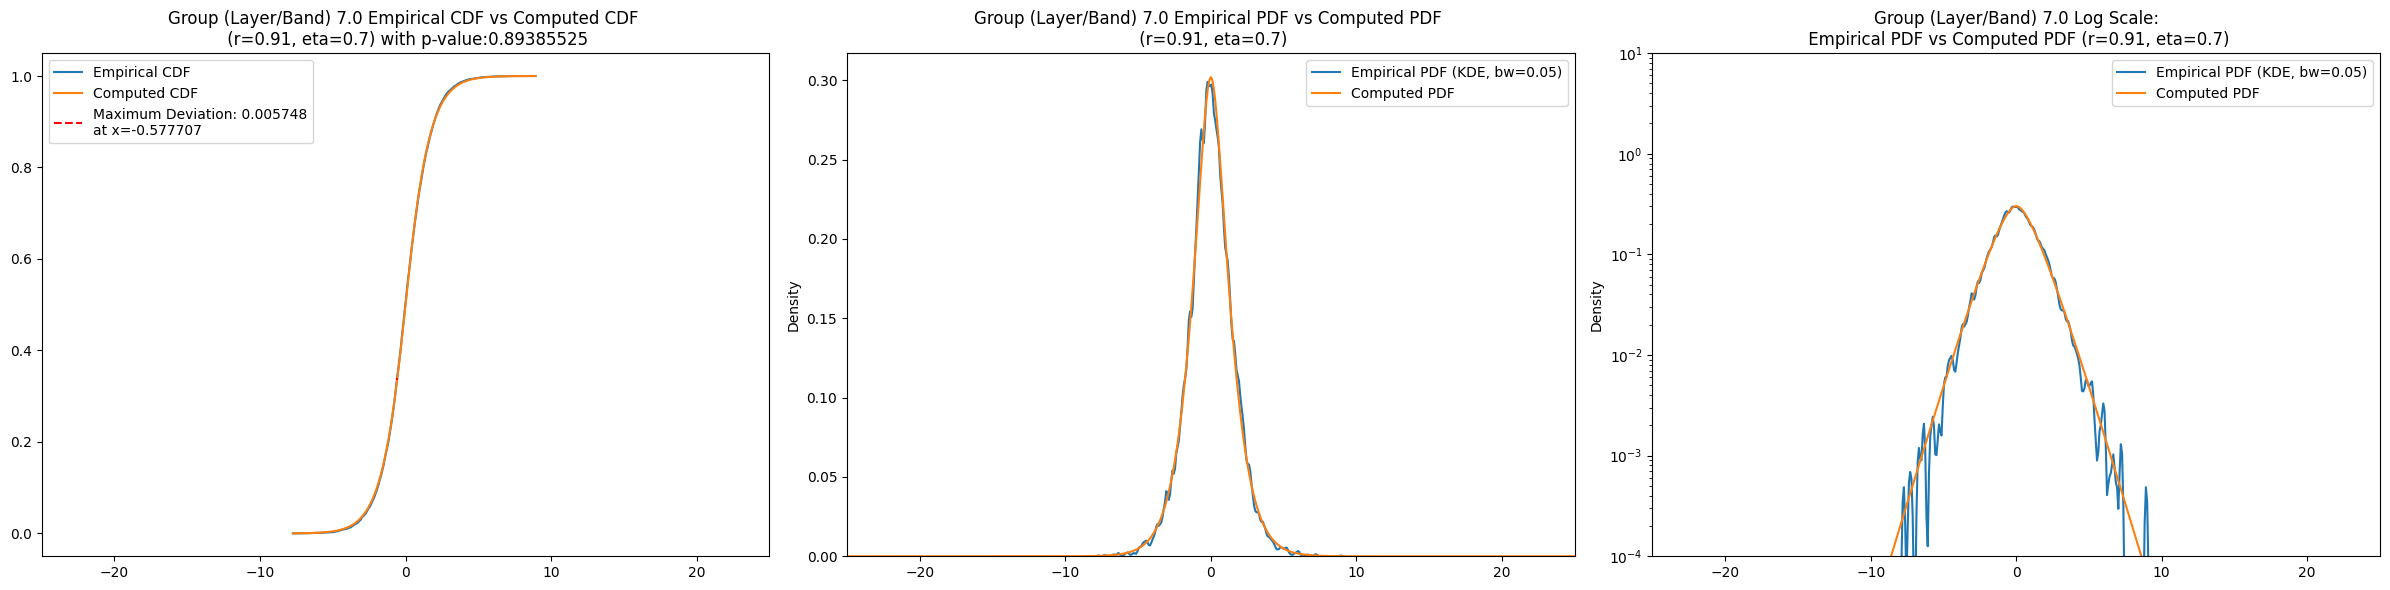

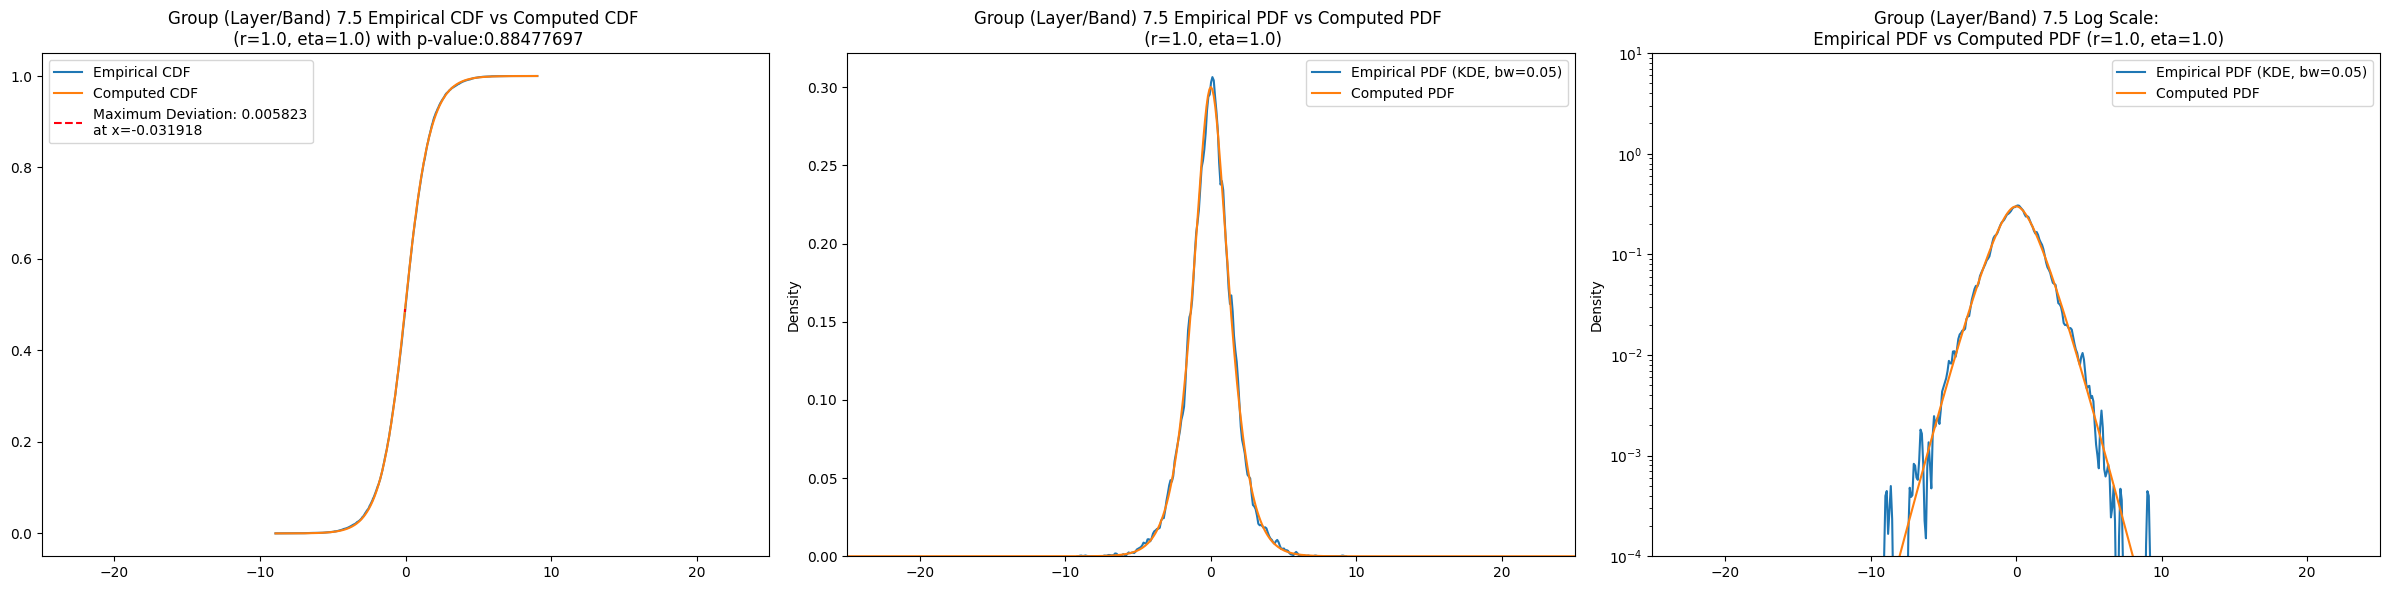

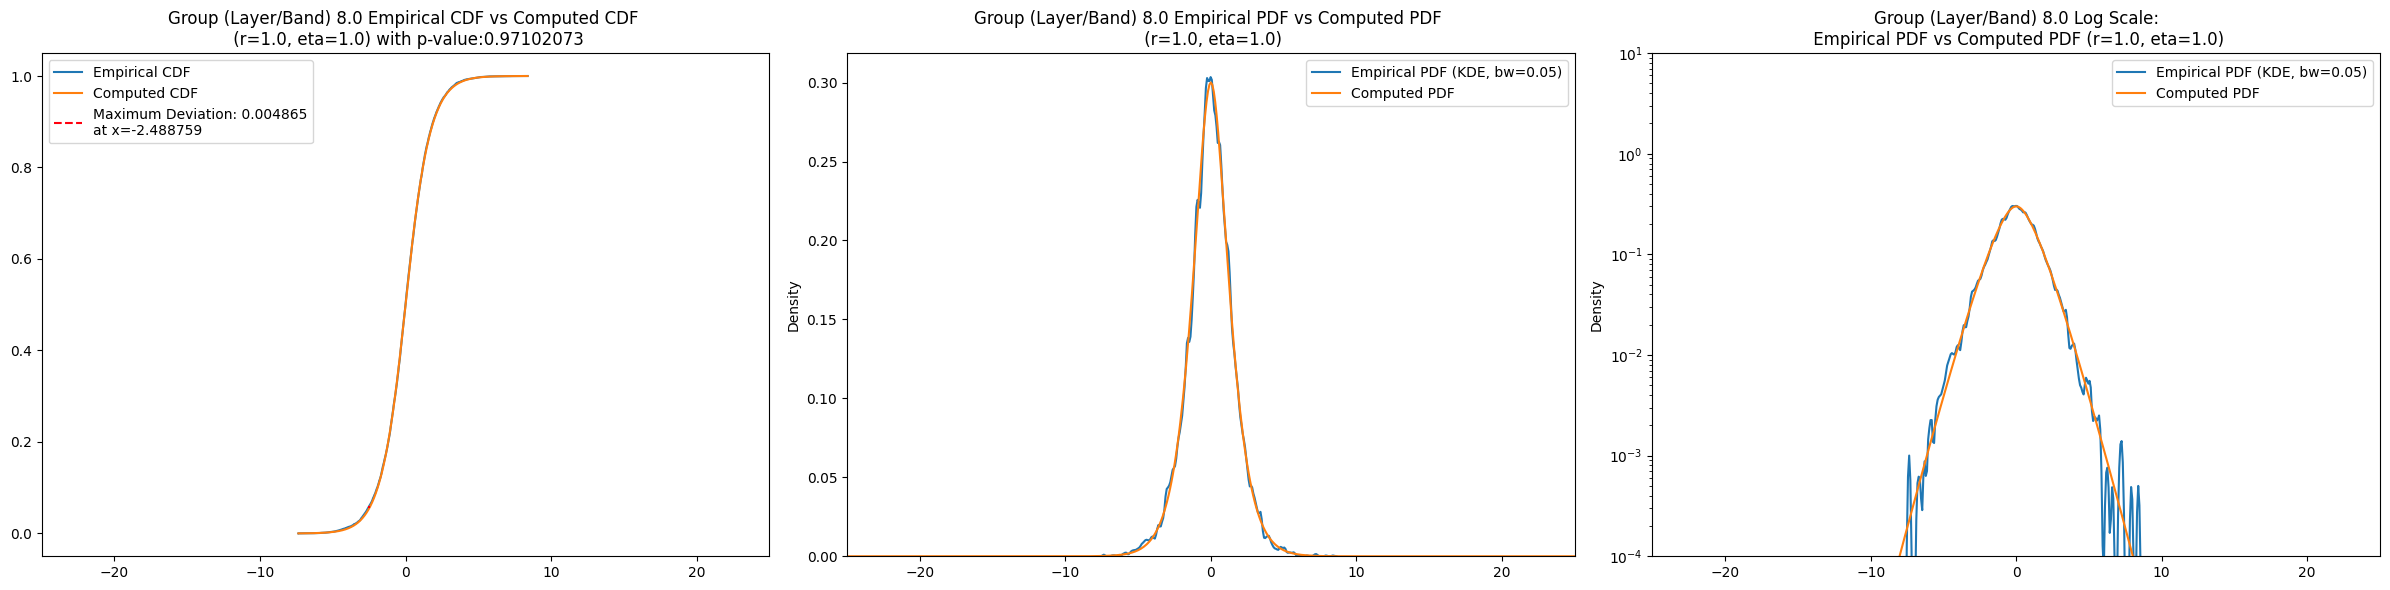

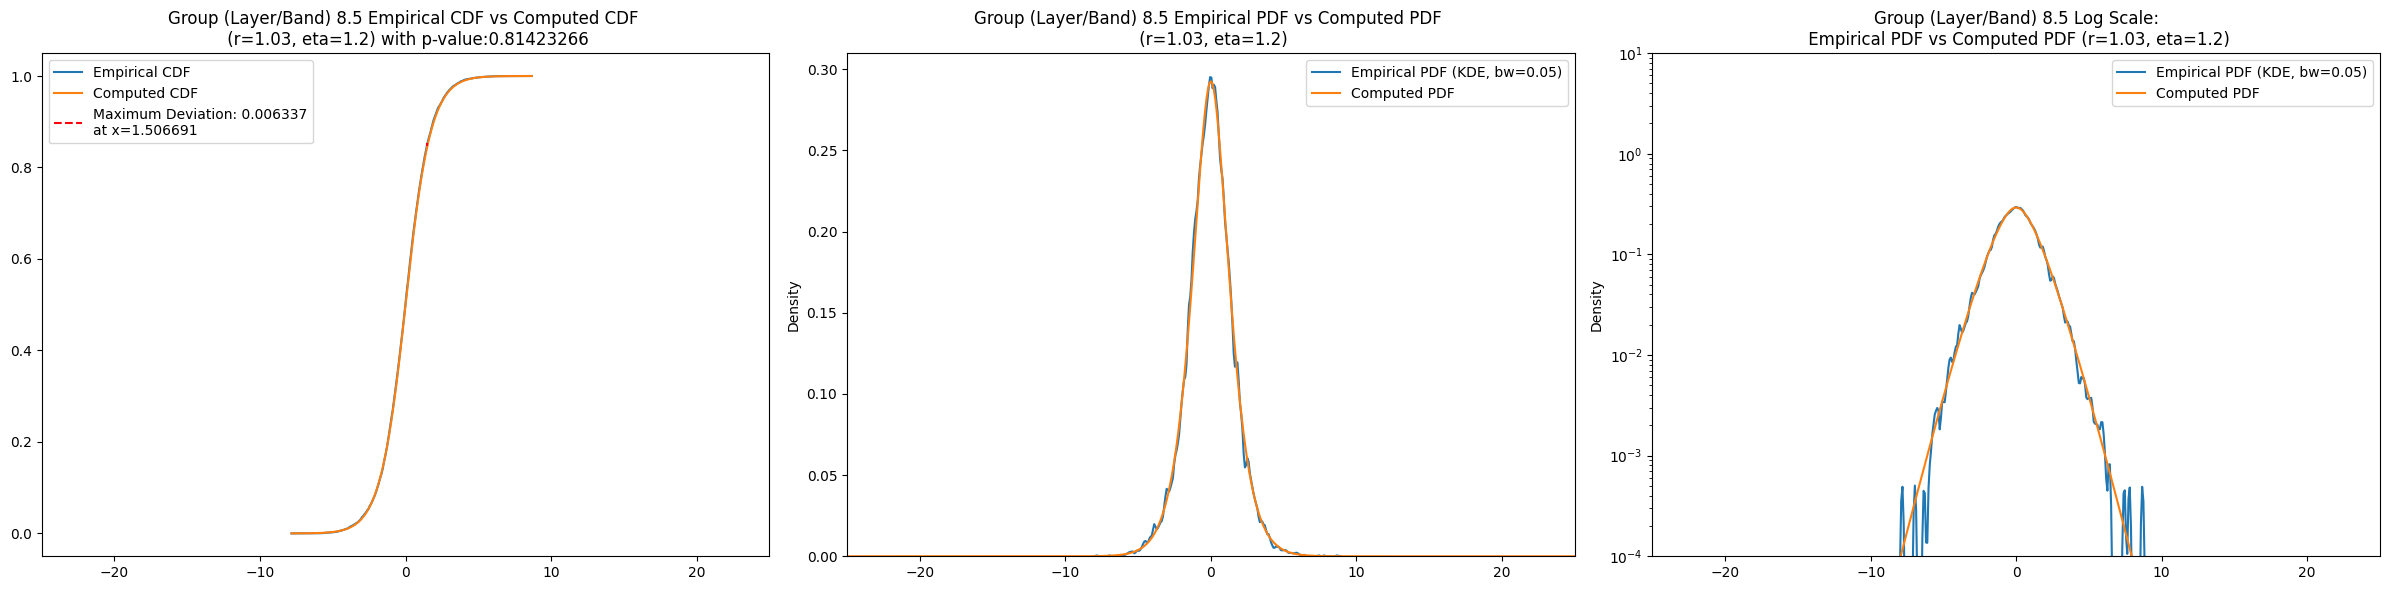

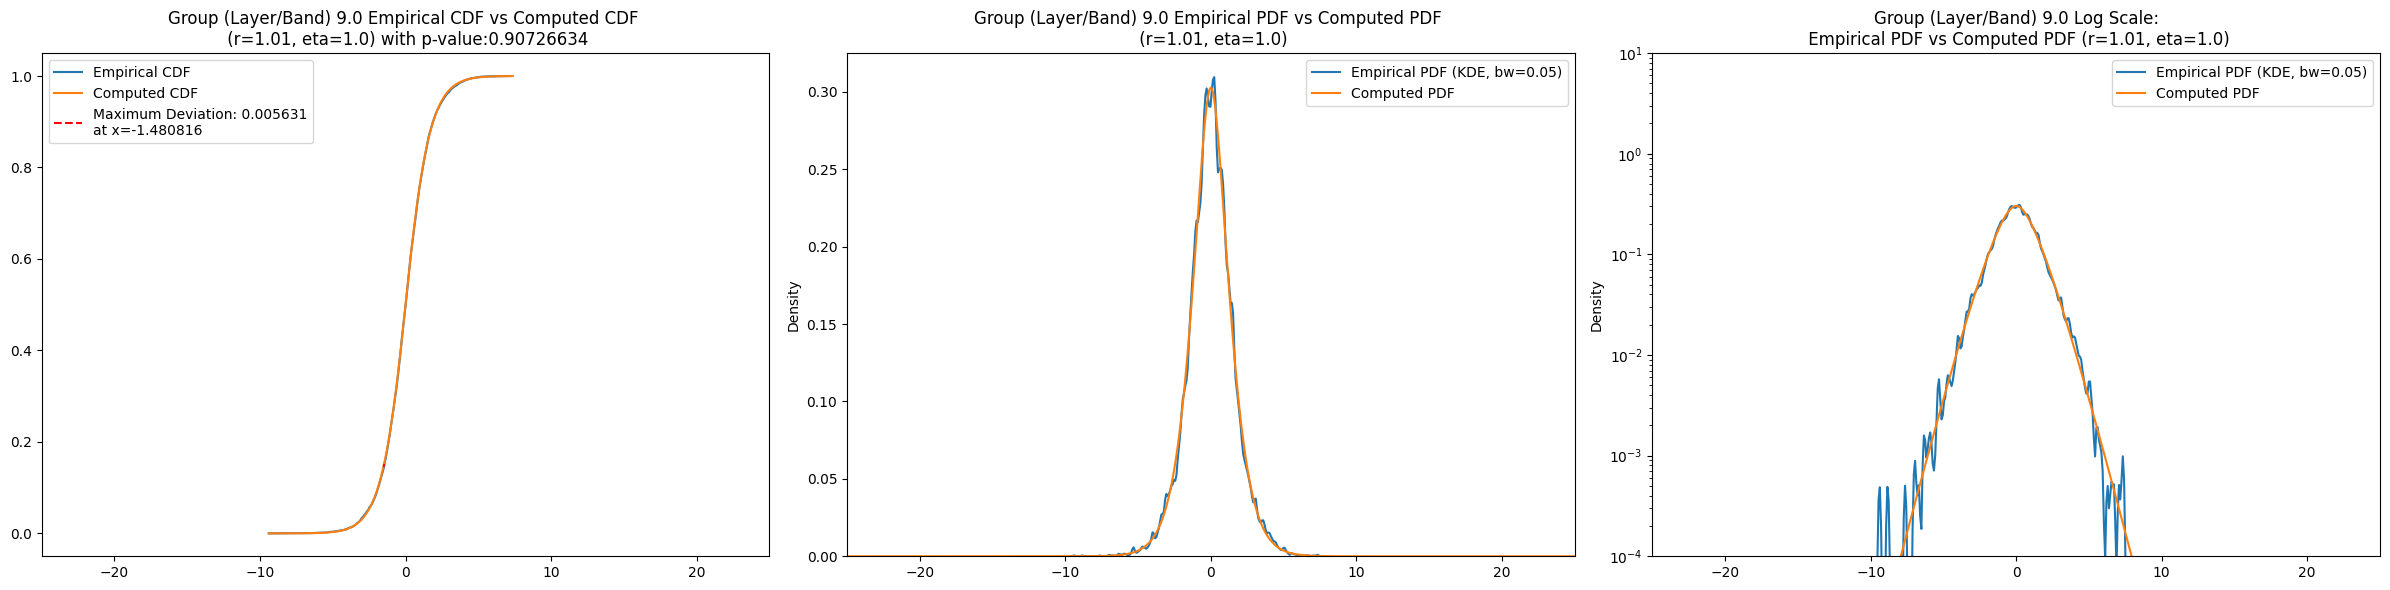

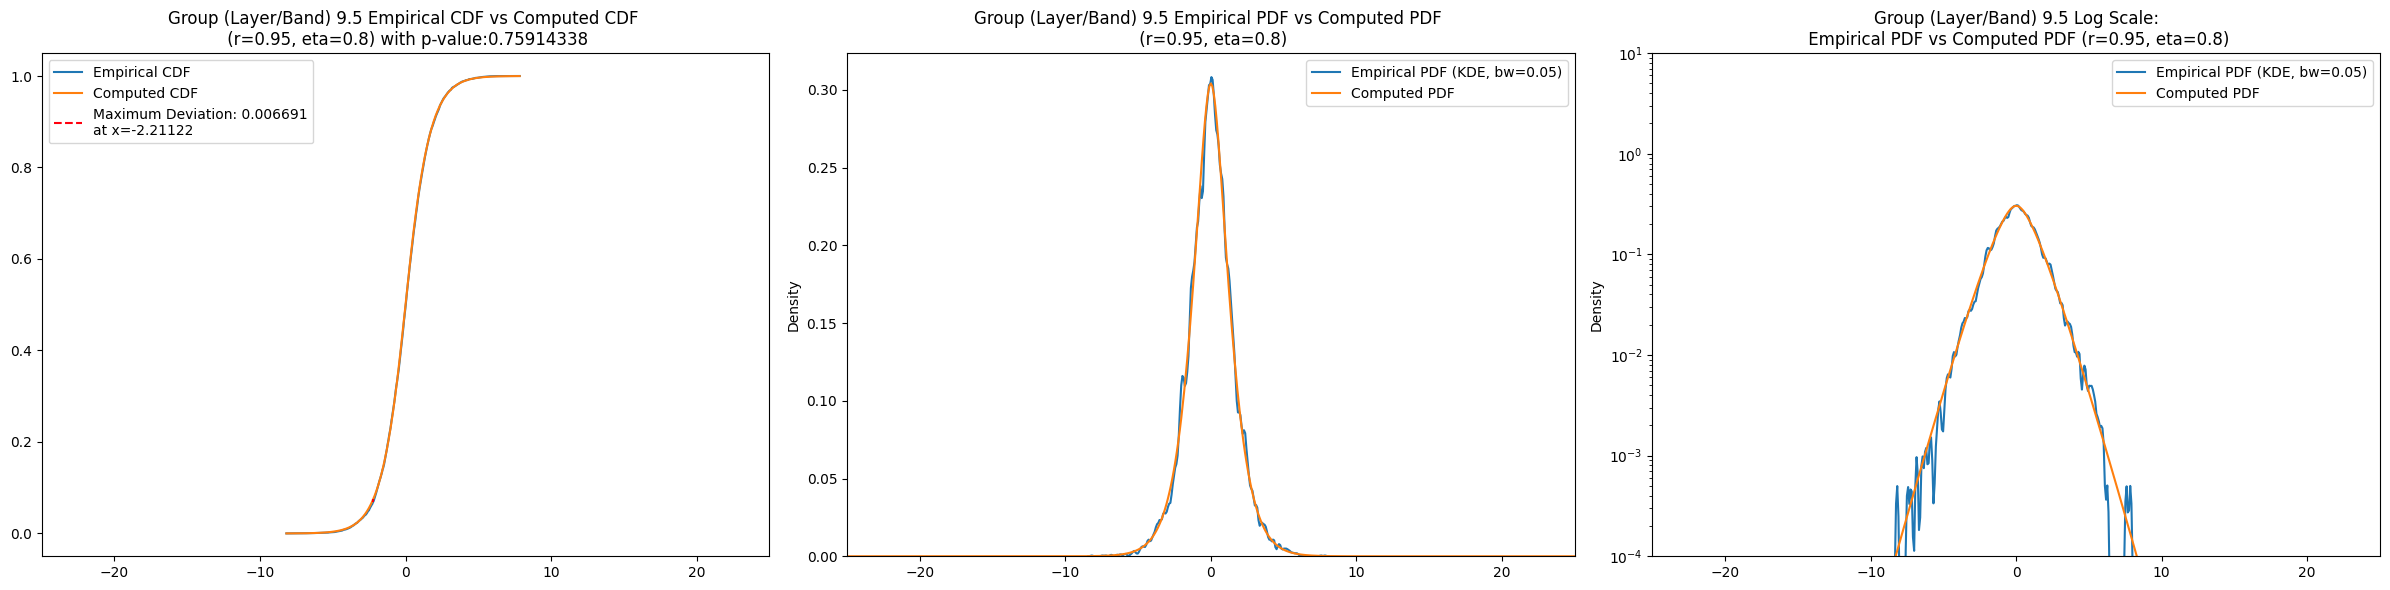

In [15]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group#,
                    #interval = (-500, 500),
                    #provided_loc=200
                    )
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace Priors

In [ ]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [ ]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var   var_lower   var_upper  obs_kurt  kurt_lower  kurt_upper  \
layer                                                                         
2        2.509465    2.394228    2.627987  1.269581    0.895752    1.774415   
3        5.007770    4.790005    5.230257  0.941049    0.696570    1.212222   
4       24.856175   23.734480   25.998470  1.124323    0.845124    1.427006   
5        1.244630    1.188862    1.301903  1.100883    0.804508    1.422297   
6       14.893657   14.248863   15.553942  0.884322    0.653904    1.128470   
7       30.009604   28.694512   31.361411  0.986986    0.717404    1.285661   
8      149.334302  143.016366  155.764761  0.716278    0.501243    0.958552   
9        7.508410    7.183794    7.845591  0.873762    0.609135    1.180370   

       total_samples  initial_r  initial_eta  kstest_stat_initial  ...  \
layer                                                              ...   
2            10000.0       0.93          0.7             0.003729  ...   
3            10000.0       0.82          1.5             0.004459  ...   
4            10000.0       0.62          2.8             0.005653  ...   
5            10000.0       1.62          0.9             0.005402  ...   
6            10000.0       0.70          3.1             0.011846  ...   
7            10000.0       0.67          4.7             0.006152  ...   
8            10000.0       0.52          5.3             0.008917  ...   
9            10000.0       0.83          2.8             0.003864  ...   

       param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
layer                                                               
2             1.45605              0.015478              0.016432   
3             2.07563              0.015429              0.016931   
4             4.59054              0.014146              0.036215   
5             1.02676              0.014015              0.038974   
6             3.59276              0.014575              0.028287   
7             5.12386              0.011714              0.127513   
8            11.46930              0.014337              0.032477   
9             2.58967              0.011286              0.155330   

       param_laplace  kstest_stat_laplace  kstest_pval_laplace   param_t  \
layer                                                                      
2           1.282180             0.017315         4.919390e-03  1.028790   
3           1.846140             0.018364         2.324490e-03  1.463280   
4           4.109060             0.019448         1.023000e-03  3.337540   
5           0.921151             0.021504         1.896410e-04  0.742795   
6           3.320570             0.029175         7.907410e-08  2.687390   
7           4.577980             0.023892         2.164740e-05  3.698550   
8          10.343800             0.025281         5.515080e-06  8.509400   
9           2.290920             0.021756         1.524990e-04  1.839980   

       kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
layer                                                      
2           0.021612   1.726870e-04              0.999704  
3           0.022970   5.139560e-05              0.994733  
4           0.022781   6.115350e-05              0.914446  
5           0.023281   3.855410e-05              0.937444  
6           0.027233   7.084540e-07              0.121086  
7           0.025161   6.224910e-06              0.858605  
8           0.026881   1.038000e-06              0.401945  
9           0.023790   2.387010e-05              0.999141  

[8 rows x 30 columns]

In [ ]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

## Results

In [ ]:
import pandas as pd
import os
master_df = pd.read_csv(os.path.join(os.getcwd(), "CSVs", 'master_df.csv'), index_col = 0)

In [ ]:
master_df#.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


obs_var   var_lower   var_upper  obs_kurt  kurt_lower  kurt_upper  \
layer                                                                         
2        2.509465    2.394228    2.627987  1.269581    0.895752    1.774415   
3        5.007770    4.790005    5.230257  0.941049    0.696570    1.212222   
4       24.856175   23.734480   25.998470  1.124323    0.845124    1.427006   
5        1.244630    1.188862    1.301903  1.100883    0.804508    1.422297   
6       14.893657   14.248863   15.553942  0.884322    0.653904    1.128470   
7       30.009604   28.694512   31.361411  0.986986    0.717404    1.285661   
8      149.334302  143.016366  155.764761  0.716278    0.501243    0.958552   
9        7.508410    7.183794    7.845591  0.873762    0.609135    1.180370   

       total_samples  initial_r  initial_eta  kstest_stat_initial  ...  \
layer                                                              ...   
2            10000.0       0.93          0.7             0.003729  ...   
3            10000.0       0.82          1.5             0.004459  ...   
4            10000.0       0.62          2.8             0.005653  ...   
5            10000.0       1.62          0.9             0.005402  ...   
6            10000.0       0.70          3.1             0.011846  ...   
7            10000.0       0.67          4.7             0.006152  ...   
8            10000.0       0.52          5.3             0.008917  ...   
9            10000.0       0.83          2.8             0.003864  ...   

       param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
layer                                                               
2             1.45605              0.015478              0.016432   
3             2.07563              0.015429              0.016931   
4             4.59054              0.014146              0.036215   
5             1.02676              0.014015              0.038974   
6             3.59276              0.014575              0.028287   
7             5.12386              0.011714              0.127513   
8            11.46930              0.014337              0.032477   
9             2.58967              0.011286              0.155330   

       param_laplace  kstest_stat_laplace  kstest_pval_laplace   param_t  \
layer                                                                      
2           1.282180             0.017315         4.919390e-03  1.028790   
3           1.846140             0.018364         2.324490e-03  1.463280   
4           4.109060             0.019448         1.023000e-03  3.337540   
5           0.921151             0.021504         1.896410e-04  0.742795   
6           3.320570             0.029175         7.907410e-08  2.687390   
7           4.577980             0.023892         2.164740e-05  3.698550   
8          10.343800             0.025281         5.515080e-06  8.509400   
9           2.290920             0.021756         1.524990e-04  1.839980   

       kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
layer                                                      
2           0.021612   1.726870e-04              0.999704  
3           0.022970   5.139560e-05              0.994733  
4           0.022781   6.115350e-05              0.914446  
5           0.023281   3.855410e-05              0.937444  
6           0.027233   7.084540e-07              0.121086  
7           0.025161   6.224910e-06              0.858605  
8           0.026881   1.038000e-06              0.401945  
9           0.023790   2.387010e-05              0.999141  

[8 rows x 30 columns]